In [1]:
!pip install confluent_kafka sseclient

In [2]:
!pip install pyspark

## Project Template

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from pyspark.sql.functions import explode
from pyspark.sql.functions import split
from pyspark.context import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col
import seaborn as sns
import matplotlib.pyplot as plt
spark = SparkSession.builder \
    .appName("MyApp") \
    .config("spark.jars.packages", 'org.apache.spark:spark-sql-kafka-0-10_2.12:3.0.0') \
    .config("spark.sql.repl.eagerEval.enabled", True) \
    .getOrCreate()


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
:: loading settings :: url = jar:file:/usr/local/lib/python3.9/dist-packages/pyspark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
org.apache.spark#spark-sql-kafka-0-10_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-51472fdb-d520-4471-ad57-ab2e95d46149;1.0
	confs: [default]
	found org.apache.spark#spark-sql-kafka-0-10_2.12;3.0.0 in central
	found org.apache.spark#spark-token-provider-kafka-0-10_2.12;3.0.0 in central
	found org.apache.kafka#kafka-clients;2.4.1 in central
	found com.github.luben#zstd-jni;1.4.4-3 in central
	found org.lz4#lz4-java;1.7.1 in central
	found org.xerial.snappy#snappy-java;1.1.7.5 in central
	found org.slf4j#slf4j-api;1.7.30 in central
	found org.spark-project.spark#unused;1.0.0 in central
	found org.apache.commons#commons-pool2;2.6.2 in central
:: resolution report :: resolve 317ms :: artifacts dl 7m

Be sure to start the stream on Kafka!

In [5]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, BooleanType, TimestampType, DateType

schema = StructType(
      [
        StructField("name", StringType(), False),
        StructField("price", DoubleType(), False),
        StructField("timestamp", TimestampType(), False),
      ]
    )

In [6]:
kafka_server = "kafka1:9092"
from pyspark.sql.functions import from_json

lines = (spark.readStream                        # Get the DataStreamReader
  .format("kafka")                                 # Specify the source format as "kafka"
  .option("kafka.bootstrap.servers", kafka_server) # Configure the Kafka server name and port
  .option("subscribe", "stock")                       # Subscribe to the "en" Kafka topic
  .option("startingOffsets", "earliest")           # The start point when a query is started
  .option("maxOffsetsPerTrigger", 100)             # Rate limit on max offsets per trigger interval
  .load()
  .select(from_json(col("value").cast("string"), schema).alias("parsed_value"))
# Load the DataFrame
)
df = lines.selectExpr("parsed_value.*")


In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, window, rank
from pyspark.sql.window import Window
from pyspark.sql.functions import desc


## The assignment starts here


## Select the N most valuable stocks in a 

23/11/06 20:09:11 WARN StreamingQueryManager: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-9abcc6dd-6315-4e4d-84a5-a76e192d13f1. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.


+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:42...| AZO|   382.14|   1|
|[2023-11-06 19:42...|ISRG| 191.9256|   2|
|[2023-11-06 19:42...|  RE|   127.16|   3|
|[2023-11-06 19:42...| PXD|   124.88|   4|
|[2023-11-06 19:42...| CMI|   119.32|   5|
|[2023-11-06 19:42...| KMB|    89.85|   6|
|[2023-11-06 19:42...|  LH|    89.64|   7|
|[2023-11-06 19:42...| ACN|    75.56|   8|
|[2023-11-06 19:42...| VTR|    71.95|   9|
|[2023-11-06 19:42...| ARE|    70.97|  10|
+--------------------+----+---------+----+



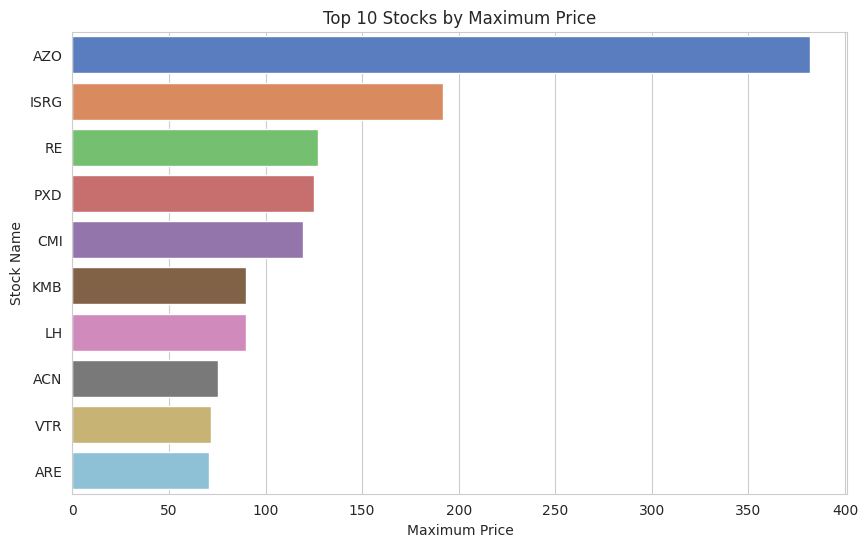

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:42...|  GWW|   225.52|   1|
|[2023-11-06 19:42...| WYNN|   119.52|   2|
|[2023-11-06 19:42...|  PVH|   113.37|   3|
|[2023-11-06 19:42...|  BXP|   109.99|   4|
|[2023-11-06 19:42...|  FRT|   105.98|   5|
|[2023-11-06 19:42...|  MTB|   104.65|   6|
|[2023-11-06 19:42...|BRK.B|   101.94|   7|
|[2023-11-06 19:42...|  AGN|    92.33|   8|
|[2023-11-06 19:42...|  CXO|    91.83|   9|
|[2023-11-06 19:42...|  CAT|    89.47|  10|
+--------------------+-----+---------+----+



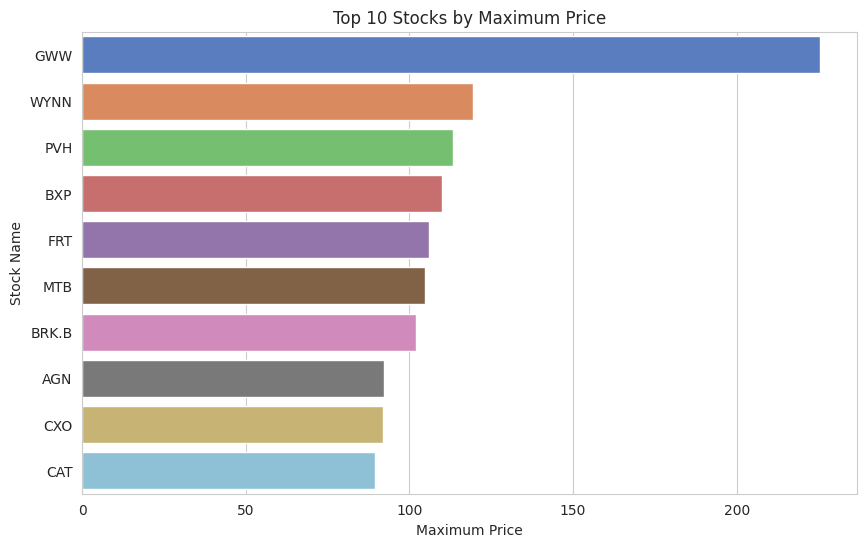

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:42...|GOOGL| 409.9095|   1|
|[2023-11-06 19:42...|  CMG|   362.18|   2|
|[2023-11-06 19:42...|  GWW|   251.07|   3|
|[2023-11-06 19:42...| EQIX|   214.11|   4|
|[2023-11-06 19:42...| ISRG| 167.6665|   5|
|[2023-11-06 19:42...|  ESS|   154.81|   6|
|[2023-11-06 19:42...|   GS|    149.5|   7|
|[2023-11-06 19:42...|  AVB|   133.16|   8|
|[2023-11-06 19:42...|  FRT|   116.94|   9|
|[2023-11-06 19:42...|   PX|   113.62|  10|
|[2023-11-06 19:44...|  CMG|   375.27|   1|
|[2023-11-06 19:44...|  WAT|    97.53|   2|
|[2023-11-06 19:44...|   PG|    79.47|   3|
|[2023-11-06 19:44...|  EMN|    67.34|   4|
+--------------------+-----+---------+----+



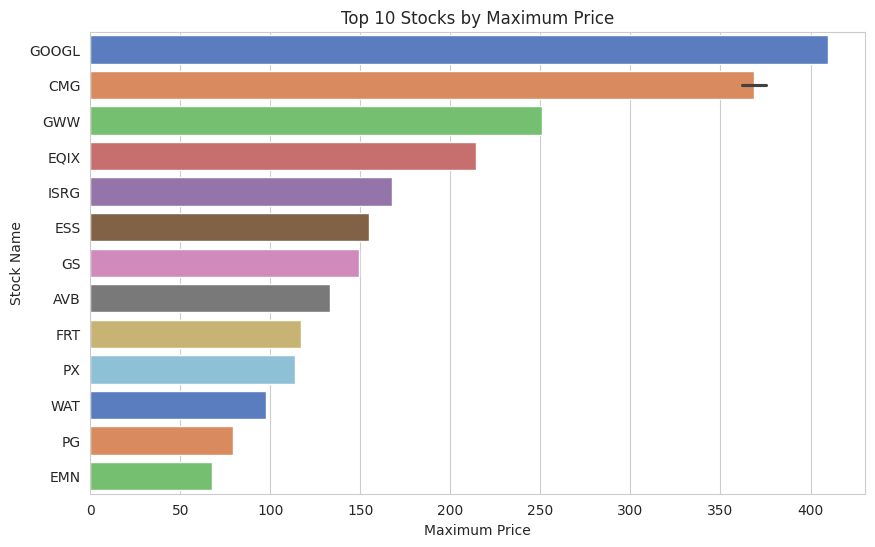

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:44...|PCLN|   805.77|   1|
|[2023-11-06 19:44...|AMZN|   265.83|   2|
|[2023-11-06 19:44...| GWW|    252.9|   3|
|[2023-11-06 19:44...| IBM|   208.59|   4|
|[2023-11-06 19:44...|EQIX|   188.66|   5|
|[2023-11-06 19:44...| ADS|    179.7|   6|
|[2023-11-06 19:44...| SPG|   171.99|   7|
|[2023-11-06 19:44...|  GS|    166.7|   8|
|[2023-11-06 19:44...| ESS|   156.26|   9|
|[2023-11-06 19:44...| AVB|   132.88|  10|
+--------------------+----+---------+----+



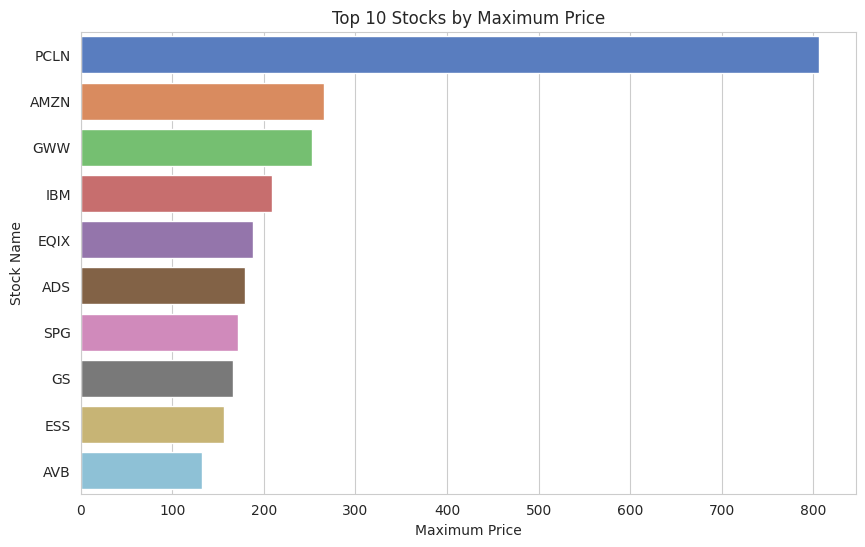

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:44...| BLK|   257.82|   1|
|[2023-11-06 19:44...| AMG|   168.09|   2|
|[2023-11-06 19:44...| PSA|    159.0|   3|
|[2023-11-06 19:44...|  GS|   152.69|   4|
|[2023-11-06 19:44...| ESS|   150.99|   5|
|[2023-11-06 19:44...| WHR|   121.79|   6|
|[2023-11-06 19:44...| AGN|   121.25|   7|
|[2023-11-06 19:44...|PRGO|   119.14|   8|
|[2023-11-06 19:44...| MTB|    116.2|   9|
|[2023-11-06 19:44...| KSU|   108.71|  10|
+--------------------+----+---------+----+



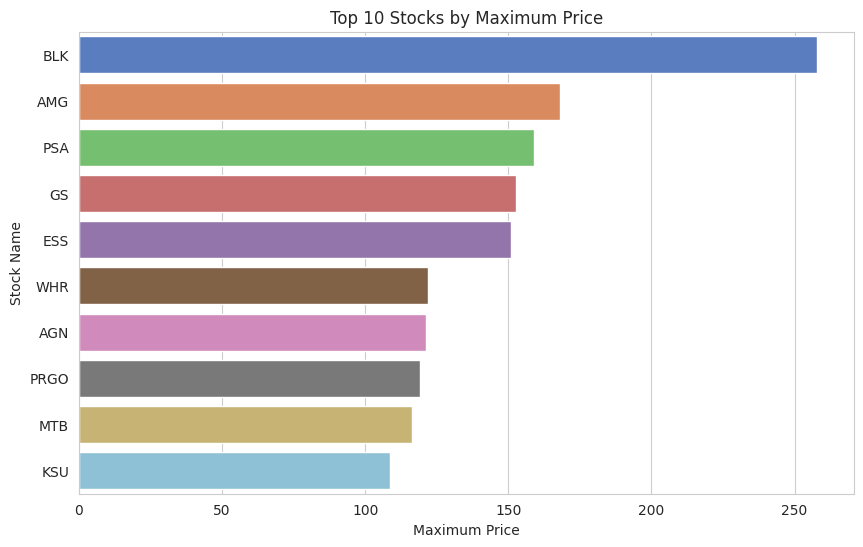

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:44...|GOOGL| 452.1717|   1|
|[2023-11-06 19:44...|   RL|   180.52|   2|
|[2023-11-06 19:44...|  AMG|   172.91|   3|
|[2023-11-06 19:44...|  ESS|   158.62|   4|
|[2023-11-06 19:44...|  COO|   126.39|   5|
|[2023-11-06 19:44...|  UTX|   106.45|   6|
|[2023-11-06 19:44...|  APD|   103.57|   7|
|[2023-11-06 19:44...| ULTA|    99.04|   8|
|[2023-11-06 19:44...|  KMB|    97.94|   9|
|[2023-11-06 19:44...|  ECL|     93.1|  10|
+--------------------+-----+---------+----+



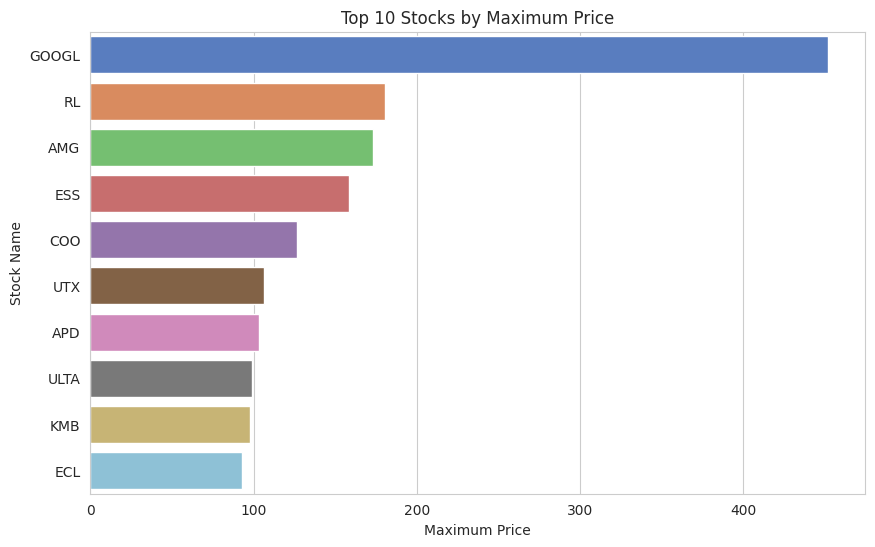

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:44...| PCLN|   979.23|   1|
|[2023-11-06 19:44...|GOOGL| 429.2839|   2|
|[2023-11-06 19:44...| REGN|   229.55|   3|
|[2023-11-06 19:44...|  PSA|   153.06|   4|
|[2023-11-06 19:44...|  CMI|    131.8|   5|
|[2023-11-06 19:44...| CHTR|   123.31|   6|
|[2023-11-06 19:44...|  MMM|   115.63|   7|
|[2023-11-06 19:44...|  BXP|   106.39|   8|
|[2023-11-06 19:44...|   LH|    97.75|   9|
|[2023-11-06 19:44...|  MLM|    95.67|  10|
+--------------------+-----+---------+----+



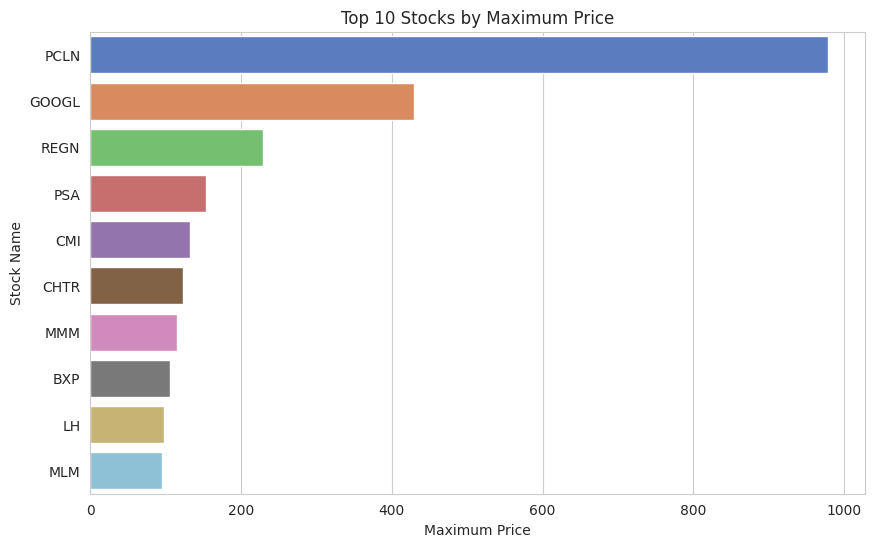

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:44...|GOOGL|  453.448|   1|
|[2023-11-06 19:44...| BIIB|   245.99|   2|
|[2023-11-06 19:44...| PRGO|   125.93|   3|
|[2023-11-06 19:44...|  AON|    70.17|   4|
|[2023-11-06 19:44...|  COF|    67.91|   5|
|[2023-11-06 19:44...|  OMC|    66.15|   6|
|[2023-11-06 19:44...|  DTE|     66.1|   7|
|[2023-11-06 19:44...|  HCN|    62.74|   8|
|[2023-11-06 19:44...| CHRW|    61.84|   9|
|[2023-11-06 19:44...|  JEC|    58.79|  10|
|[2023-11-06 19:46...|  AZO|   382.14|   1|
|[2023-11-06 19:46...| ISRG| 191.9256|   2|
|[2023-11-06 19:46...|  PXD|   122.17|   3|
|[2023-11-06 19:46...|  CMI|   119.32|   4|
|[2023-11-06 19:46...|  KMB|    89.85|   5|
|[2023-11-06 19:46...|   LH|    89.64|   6|
|[2023-11-06 19:46...|  ACN|    75.56|   7|
|[2023-11-06 19:46...|  VTR|    71.95|   8|
|[2023-11-06 19:46...|  ARE|    70.97|   9|
|[2023-11-06 19:46...|  PPG|    

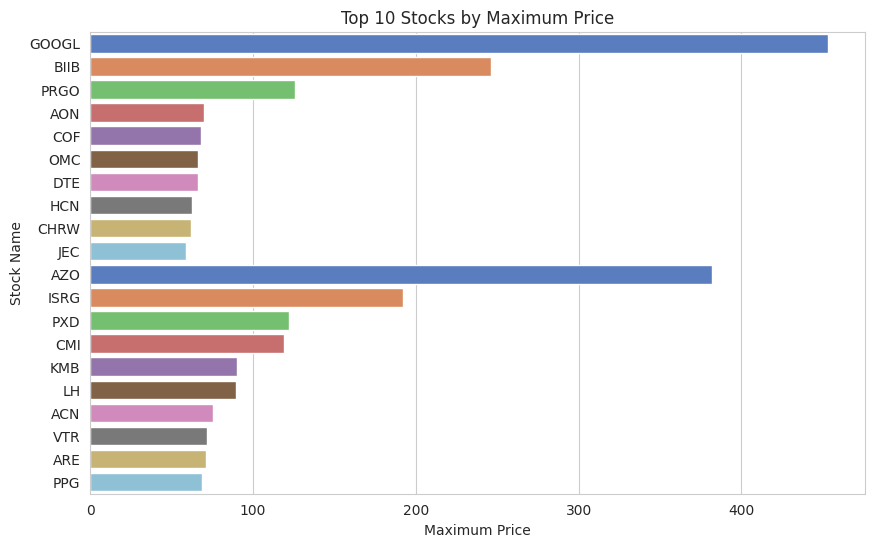

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:48...|  GWW|   225.52|   1|
|[2023-11-06 19:48...|  CXO|    91.83|   2|
|[2023-11-06 19:48...|   CB|    88.92|   3|
|[2023-11-06 19:48...|  SNA|     81.8|   4|
|[2023-11-06 19:48...| INTU|    64.14|   5|
|[2023-11-06 19:48...|  HOG|    50.04|   6|
|[2023-11-06 19:48...|  DPS|    46.13|   7|
|[2023-11-06 19:48...| FISV|   43.035|   8|
|[2023-11-06 19:48...|  AVY|     42.6|   9|
|[2023-11-06 19:48...|  VFC|  39.9429|  10|
|[2023-11-06 19:46...|   RE|   127.16|   1|
|[2023-11-06 19:46...|  PXD|   124.88|   2|
|[2023-11-06 19:46...| WYNN|   119.52|   3|
|[2023-11-06 19:46...|  PVH|   113.37|   4|
|[2023-11-06 19:46...|  FRT|   105.98|   5|
|[2023-11-06 19:46...|  MTB|   104.65|   6|
|[2023-11-06 19:46...|BRK.B|   101.94|   7|
|[2023-11-06 19:46...|  AGN|    92.33|   8|
|[2023-11-06 19:46...|  CAT|    89.47|   9|
|[2023-11-06 19:46...|  ROK|    

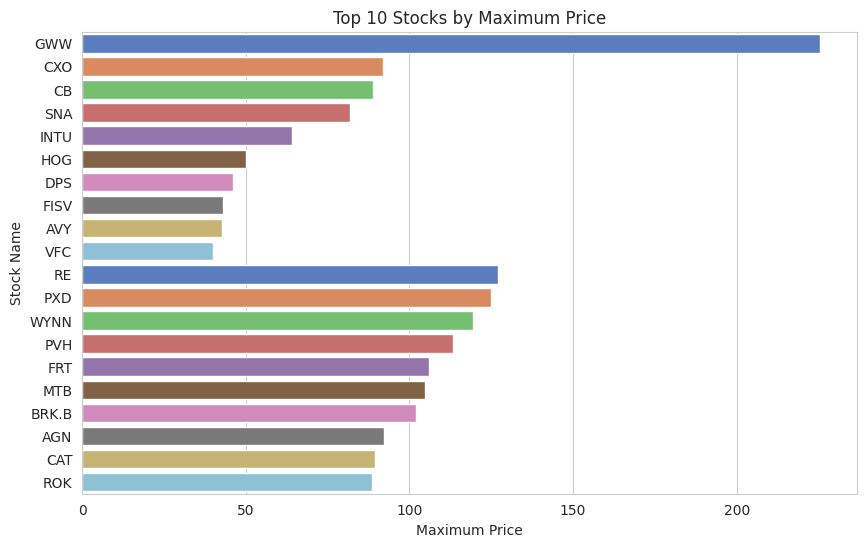

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:48...|GOOGL| 409.9095|   1|
|[2023-11-06 19:48...|  CMG|   362.18|   2|
|[2023-11-06 19:48...|  GWW|   251.07|   3|
|[2023-11-06 19:48...| EQIX|   214.11|   4|
|[2023-11-06 19:48...| ISRG| 167.6665|   5|
|[2023-11-06 19:48...|  ESS|   154.81|   6|
|[2023-11-06 19:48...|   GS|   145.83|   7|
|[2023-11-06 19:48...|  AVB|   133.16|   8|
|[2023-11-06 19:48...|  FRT|   116.94|   9|
|[2023-11-06 19:48...|   PX|   113.62|  10|
+--------------------+-----+---------+----+



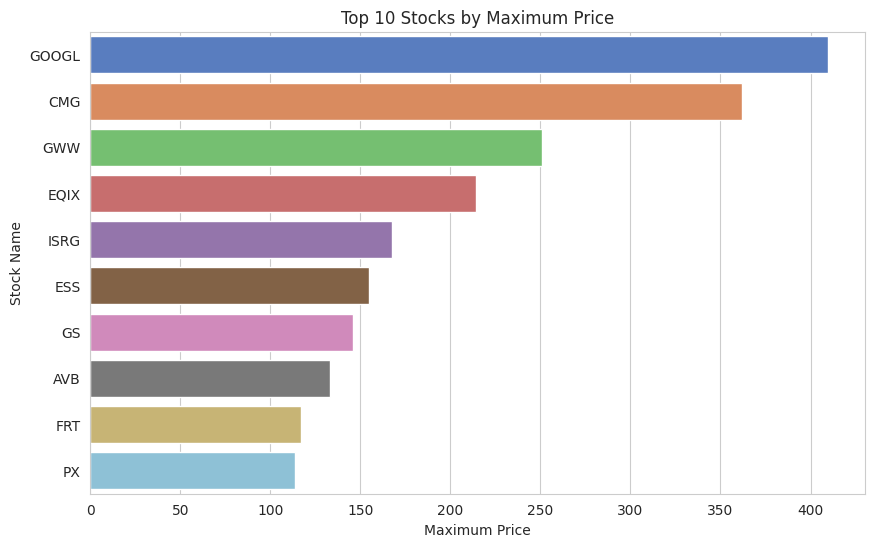

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:48...|PCLN|   805.77|   1|
|[2023-11-06 19:48...| CMG|   375.27|   2|
|[2023-11-06 19:48...|AMZN|   265.83|   3|
|[2023-11-06 19:48...| GWW|    252.9|   4|
|[2023-11-06 19:48...| IBM|   208.59|   5|
|[2023-11-06 19:48...|EQIX|   188.66|   6|
|[2023-11-06 19:48...| SPG|   171.99|   7|
|[2023-11-06 19:48...|  GS|    166.7|   8|
|[2023-11-06 19:48...| ESS|   156.26|   9|
|[2023-11-06 19:48...| AVB|   132.88|  10|
+--------------------+----+---------+----+



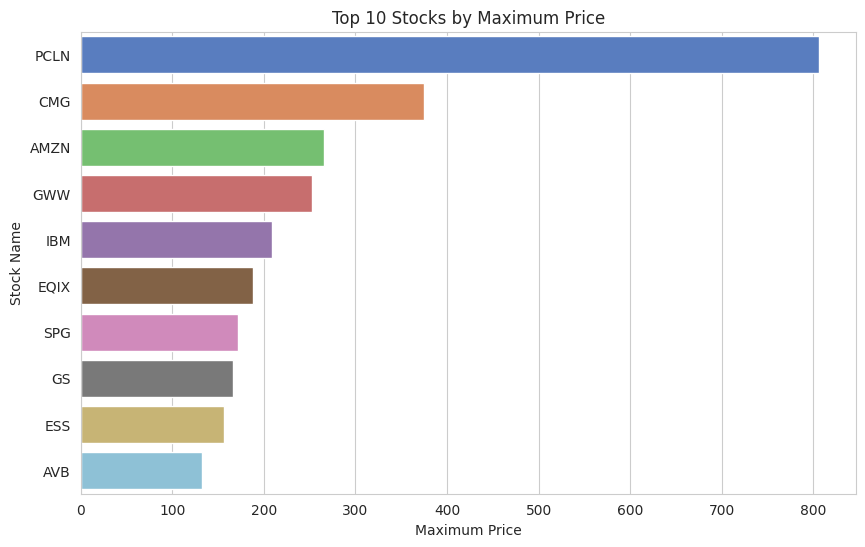

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:48...| BLK|   257.82|   1|
|[2023-11-06 19:48...| ADS|    179.7|   2|
|[2023-11-06 19:48...|  GS|   152.69|   3|
|[2023-11-06 19:48...| ESS|   150.99|   4|
|[2023-11-06 19:48...| PSA|   148.52|   5|
|[2023-11-06 19:48...| WHR|   121.79|   6|
|[2023-11-06 19:48...| AGN|   121.25|   7|
|[2023-11-06 19:48...|PRGO|   119.14|   8|
|[2023-11-06 19:48...| MTB|    116.2|   9|
|[2023-11-06 19:48...| KSU|   108.71|  10|
+--------------------+----+---------+----+



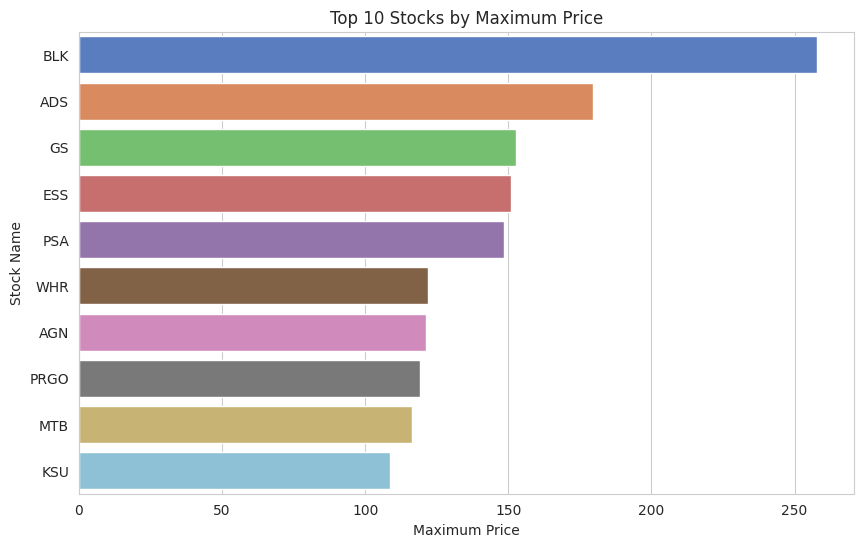

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:48...|GOOGL| 452.1717|   1|
|[2023-11-06 19:48...|   RL|   180.52|   2|
|[2023-11-06 19:48...|  AMG|   172.91|   3|
|[2023-11-06 19:48...|  PSA|    159.0|   4|
|[2023-11-06 19:48...|  ESS|   158.62|   5|
|[2023-11-06 19:48...|  COO|   126.39|   6|
|[2023-11-06 19:48...|  UTX|   106.45|   7|
|[2023-11-06 19:48...| ULTA|    99.04|   8|
|[2023-11-06 19:48...|  APD|    97.04|   9|
|[2023-11-06 19:48...|   CB|     92.4|  10|
+--------------------+-----+---------+----+



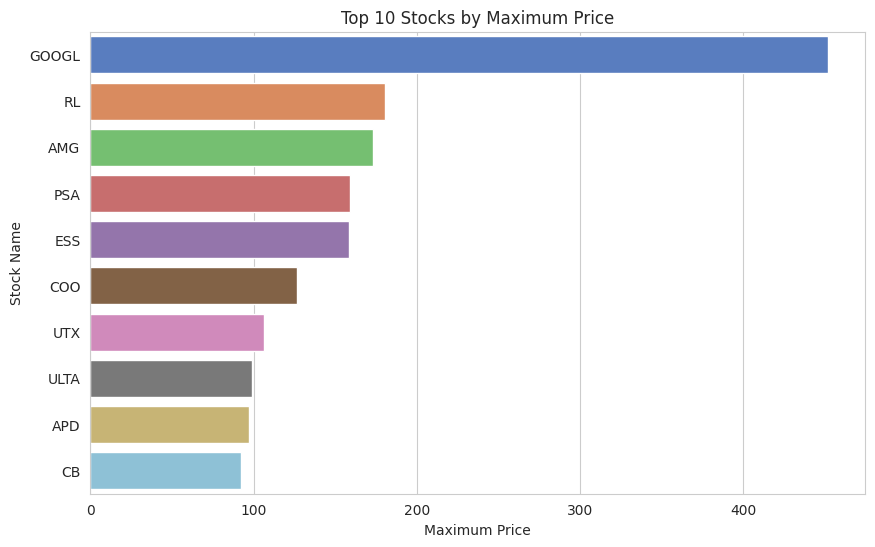

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:49...|  PSA|   153.06|   1|
|[2023-11-06 19:49...| CHTR|   123.31|   2|
|[2023-11-06 19:49...|  MMM|   115.63|   3|
|[2023-11-06 19:49...|   LH|    97.75|   4|
|[2023-11-06 19:49...|  MLM|    95.67|   5|
|[2023-11-06 19:49...|  ECL|    93.42|   6|
|[2023-11-06 19:49...| VIAB|    79.43|   7|
|[2023-11-06 19:49...|  NOV|    78.18|   8|
|[2023-11-06 19:49...|  EMN|    77.19|   9|
|[2023-11-06 19:49...| CTXS|     71.1|  10|
|[2023-11-06 19:48...|GOOGL| 432.6522|   1|
|[2023-11-06 19:48...| REGN|   229.55|   2|
|[2023-11-06 19:48...|  APD|   103.57|   3|
|[2023-11-06 19:48...|  KMB|    97.94|   4|
|[2023-11-06 19:48...|  ECL|     93.1|   5|
|[2023-11-06 19:48...|   CB|    89.82|   6|
|[2023-11-06 19:48...|  SLG|    87.95|   7|
|[2023-11-06 19:48...|  EQT|    84.25|   8|
|[2023-11-06 19:48...|  PEP|    78.99|   9|
|[2023-11-06 19:48...|  PNC|    

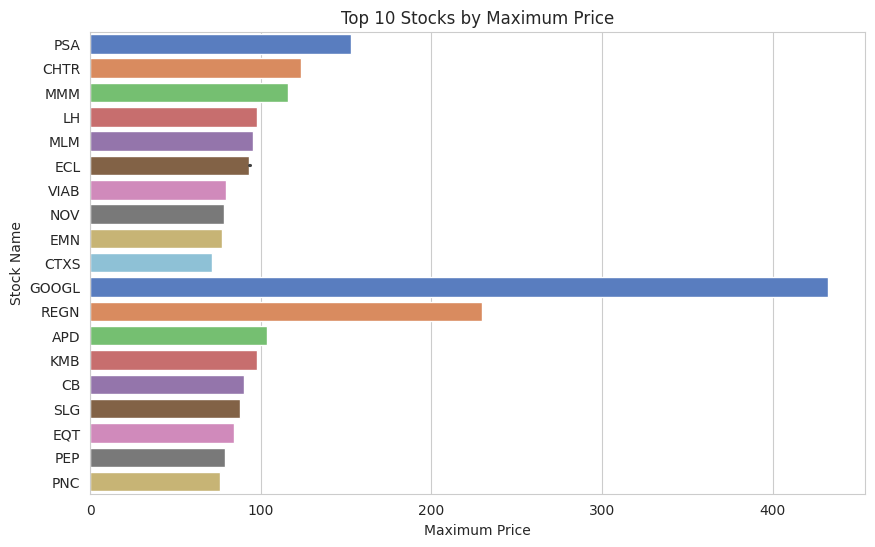

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:49...| PCLN|   979.23|   1|
|[2023-11-06 19:49...|GOOGL|  453.448|   2|
|[2023-11-06 19:49...| BIIB|   245.99|   3|
|[2023-11-06 19:49...|  SPG|   150.98|   4|
|[2023-11-06 19:49...|  CMI|    131.8|   5|
|[2023-11-06 19:49...| PRGO|   125.93|   6|
|[2023-11-06 19:49...|  SJM|   106.57|   7|
|[2023-11-06 19:49...|  BXP|   106.39|   8|
|[2023-11-06 19:49...|  UTX|   103.44|   9|
|[2023-11-06 19:49...|  BDX|   101.77|  10|
+--------------------+-----+---------+----+



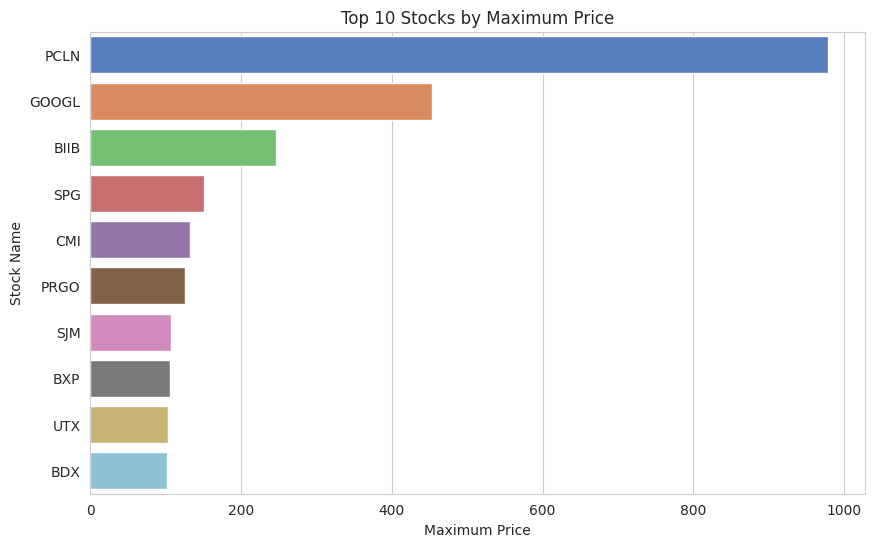

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:49...| ESS|   155.94|   1|
|[2023-11-06 19:49...| CMI|   136.19|   2|
|[2023-11-06 19:49...|  BA|   133.75|   3|
|[2023-11-06 19:49...|PRGO|   130.64|   4|
|[2023-11-06 19:49...|ORLY|    127.5|   5|
|[2023-11-06 19:49...| LMT|   127.47|   6|
|[2023-11-06 19:49...|  PH|   113.76|   7|
|[2023-11-06 19:49...| KSU|   112.65|   8|
|[2023-11-06 19:49...| ROK|   110.09|   9|
|[2023-11-06 19:49...| MON|   107.46|  10|
+--------------------+----+---------+----+



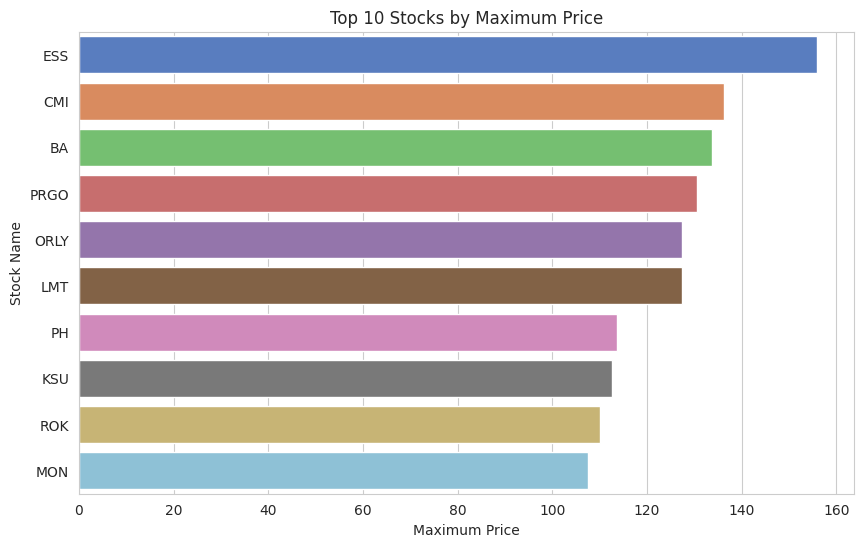

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:49...|PCLN|  1164.23|   1|
|[2023-11-06 19:49...| AZO|   450.57|   2|
|[2023-11-06 19:49...| MTD|   247.97|   3|
|[2023-11-06 19:49...| ADS|   244.89|   4|
|[2023-11-06 19:49...| IBM|   184.63|   5|
|[2023-11-06 19:49...|  RL|   171.97|   6|
|[2023-11-06 19:49...| MCK|   163.43|   7|
|[2023-11-06 19:49...|WYNN|   162.72|   8|
|[2023-11-06 19:49...|  RE|   157.52|   9|
|[2023-11-06 19:49...| TDG|   147.14|  10|
+--------------------+----+---------+----+



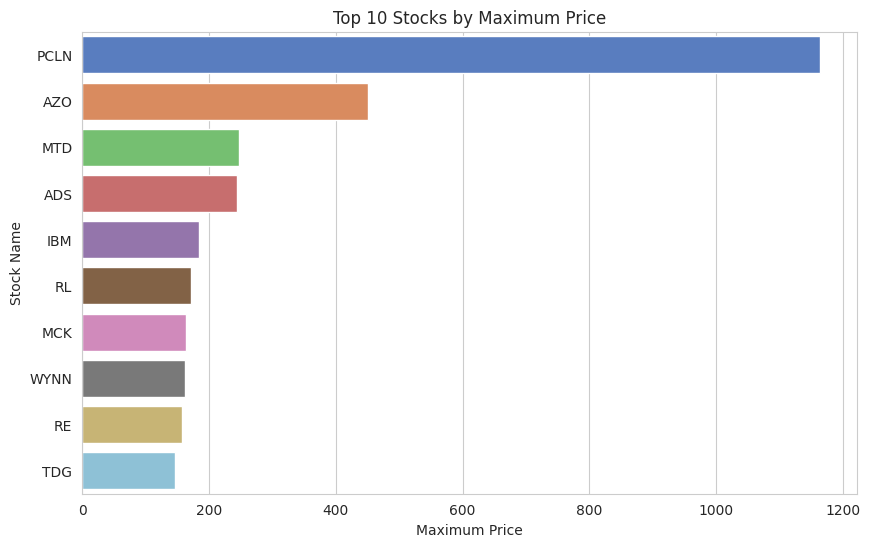

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:49...| CMG|   536.84|   1|
|[2023-11-06 19:49...|BIIB|   275.83|   2|
|[2023-11-06 19:49...|REGN|   270.17|   3|
|[2023-11-06 19:49...| ADS|   256.35|   4|
|[2023-11-06 19:49...| WHR|   158.05|   5|
|[2023-11-06 19:49...|  RE|   147.64|   6|
|[2023-11-06 19:49...| LMT|   145.17|   7|
|[2023-11-06 19:49...|CHTR|   131.88|   8|
|[2023-11-06 19:49...|  PH|   118.39|   9|
|[2023-11-06 19:49...| MTB|   116.31|  10|
+--------------------+----+---------+----+



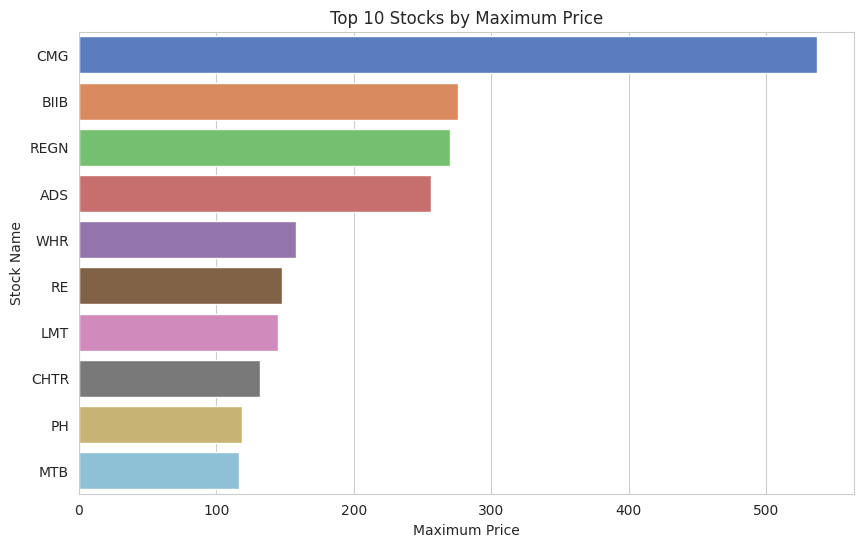

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:49...| MTD|   251.63|   1|
|[2023-11-06 19:49...| PXD|   171.78|   2|
|[2023-11-06 19:49...|  RL|   157.35|   3|
|[2023-11-06 19:49...| MHK|   143.24|   4|
|[2023-11-06 19:49...| ROP|   137.75|   5|
|[2023-11-06 19:49...|  PX|   132.25|   6|
|[2023-11-06 19:49...| MMM|   130.02|   7|
|[2023-11-06 19:49...|COST|    115.6|   8|
|[2023-11-06 19:49...| AMP|   113.48|   9|
|[2023-11-06 19:49...| FRT|   104.43|  10|
|[2023-11-06 19:50...| CMG|    490.0|   1|
|[2023-11-06 19:50...|  GS|   162.78|   2|
|[2023-11-06 19:50...| COO|   124.73|   3|
|[2023-11-06 19:50...|  PH|   111.93|   4|
|[2023-11-06 19:50...| AMP|   106.32|   5|
|[2023-11-06 19:50...| HSY|    97.71|   6|
|[2023-11-06 19:50...| UPS|    94.14|   7|
|[2023-11-06 19:50...| PPG|    91.85|   8|
|[2023-11-06 19:50...| ACN|    78.39|   9|
|[2023-11-06 19:50...|  PM|    78.31|  10|
+----------

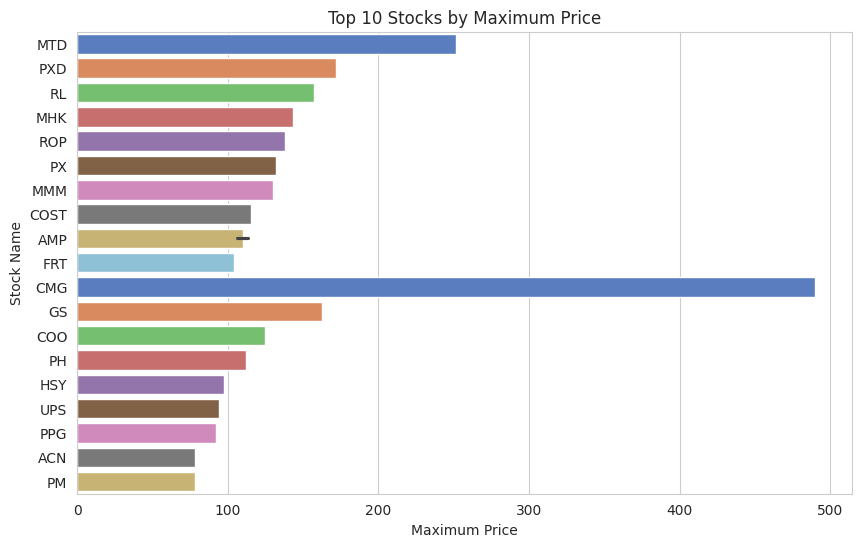

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:50...|REGN|   343.33|   1|
|[2023-11-06 19:50...| BLK|   306.07|   2|
|[2023-11-06 19:50...| GWW|   250.68|   3|
|[2023-11-06 19:50...| MTD|   247.09|   4|
|[2023-11-06 19:50...| SHW|   205.82|   5|
|[2023-11-06 19:50...|EQIX|   190.45|   6|
|[2023-11-06 19:50...|ALXN|   179.77|   7|
|[2023-11-06 19:50...|  RL|   160.15|   8|
|[2023-11-06 19:50...|ORLY|   153.61|   9|
|[2023-11-06 19:50...|  RE|   148.04|  10|
+--------------------+----+---------+----+



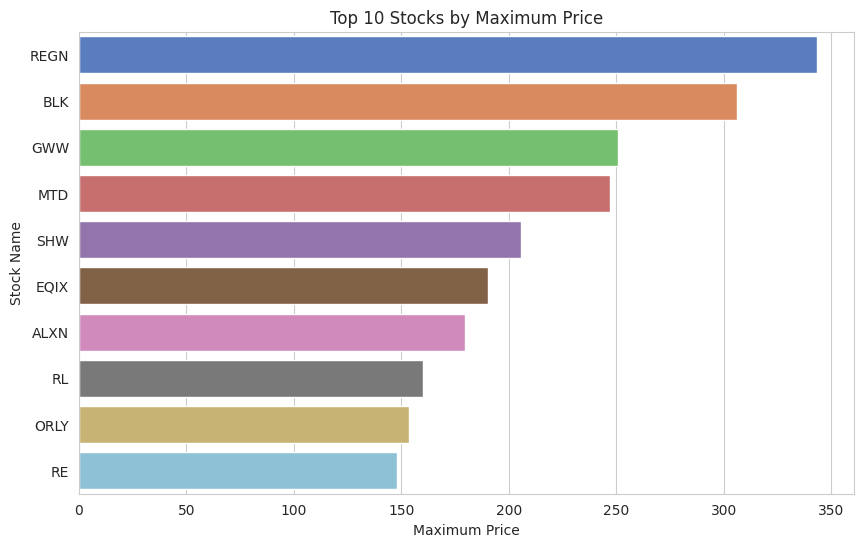

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:50...| AZO|    535.0|   1|
|[2023-11-06 19:50...| SHW|    201.0|   2|
|[2023-11-06 19:50...|ORLY|   148.37|   3|
|[2023-11-06 19:50...| CMI|   140.86|   4|
|[2023-11-06 19:50...| MHK|    136.7|   5|
|[2023-11-06 19:50...| MLM|   127.11|   6|
|[2023-11-06 19:50...| AAP|   126.96|   7|
|[2023-11-06 19:50...| NOC|   125.55|   8|
|[2023-11-06 19:50...| CVX|    117.8|   9|
|[2023-11-06 19:50...| BDX|    115.0|  10|
+--------------------+----+---------+----+



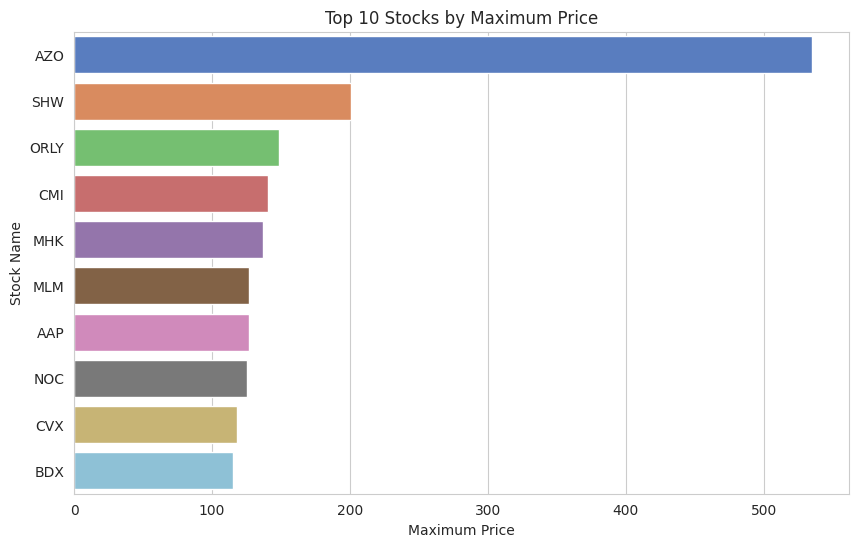

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:50...| AZO|   513.44|   1|
|[2023-11-06 19:50...| BLK|   298.21|   2|
|[2023-11-06 19:50...| SHW|   190.59|   3|
|[2023-11-06 19:50...| PSA|   169.75|   4|
|[2023-11-06 19:50...| MCK|    165.8|   5|
|[2023-11-06 19:50...|  RL|   155.15|   6|
|[2023-11-06 19:50...| LLL|    117.0|   7|
|[2023-11-06 19:50...| SNA|   115.47|   8|
|[2023-11-06 19:50...|  GD|    112.0|   9|
|[2023-11-06 19:50...|FFIV|   103.85|  10|
+--------------------+----+---------+----+



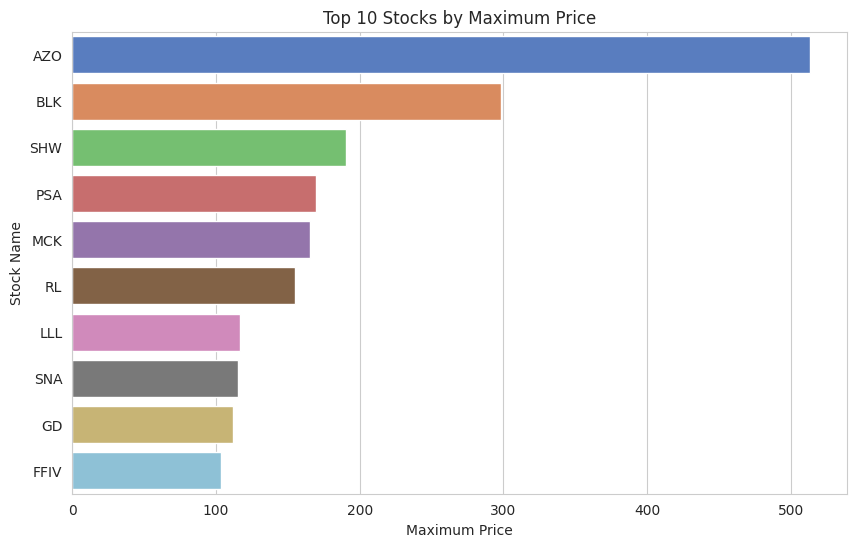

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 19:58...|  AZO|   382.14|   1|
|[2023-11-06 19:58...| ISRG| 191.9256|   2|
|[2023-11-06 19:58...|  CMI|   119.32|   3|
|[2023-11-06 19:58...|  KMB|    89.85|   4|
|[2023-11-06 19:58...|   LH|    89.64|   5|
|[2023-11-06 19:58...|  PPG|    68.51|   6|
|[2023-11-06 19:58...|  YUM|    64.27|   7|
|[2023-11-06 19:58...|  DTE|    64.24|   8|
|[2023-11-06 19:58...|  MAC|    61.06|   9|
|[2023-11-06 19:58...|  PNW|    54.45|  10|
|[2023-11-06 19:50...|  CMG|    506.5|   1|
|[2023-11-06 19:50...|  TDG|   188.03|   2|
|[2023-11-06 19:50...|  ROP|   141.29|   3|
|[2023-11-06 19:50...|  MHK|   133.67|   4|
|[2023-11-06 19:50...|  PVH|   131.08|   5|
|[2023-11-06 19:50...|BRK.B|   126.92|   6|
|[2023-11-06 19:50...|  AYI|   125.77|   7|
|[2023-11-06 19:50...|  HUM|   123.78|   8|
|[2023-11-06 19:50...|  AAP|   121.48|   9|
|[2023-11-06 19:50...|   GD|    

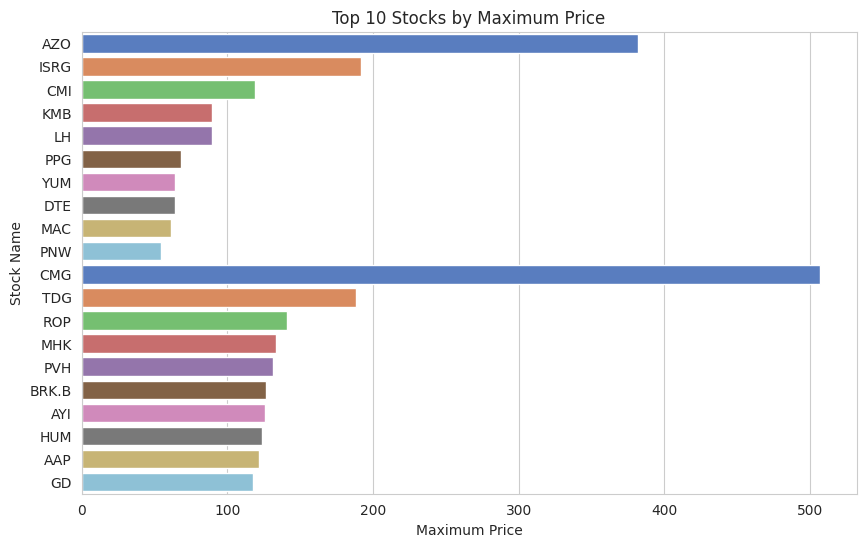

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:58...|  RE|   127.16|   1|
|[2023-11-06 19:58...| PXD|   124.88|   2|
|[2023-11-06 19:58...|WYNN|   119.52|   3|
|[2023-11-06 19:58...| MTB|   104.65|   4|
|[2023-11-06 19:58...| CAT|    89.47|   5|
|[2023-11-06 19:58...| ROK|    88.41|   6|
|[2023-11-06 19:58...| OXY|    81.82|   7|
|[2023-11-06 19:58...| TRV|    81.56|   8|
|[2023-11-06 19:58...| SWK|    80.62|   9|
|[2023-11-06 19:58...|ANSS|     80.0|  10|
+--------------------+----+---------+----+



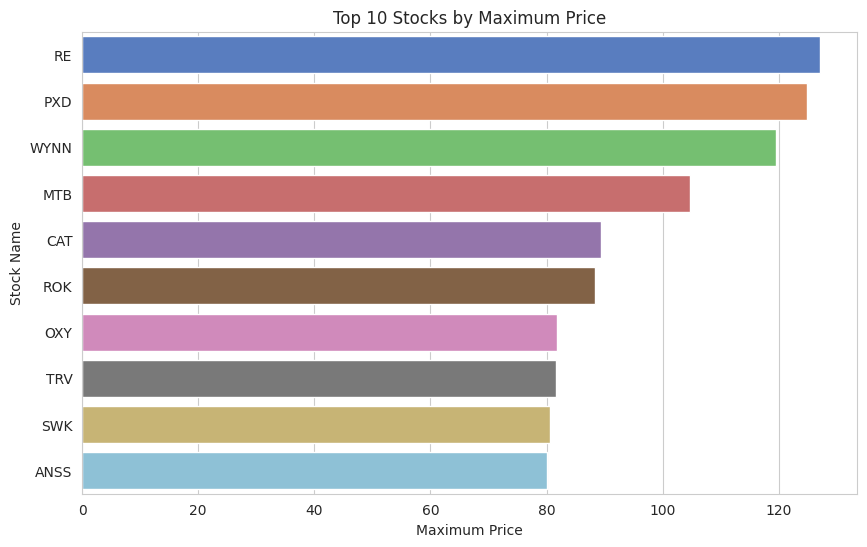

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 19:58...| GWW|   225.52|   1|
|[2023-11-06 19:58...|EQIX|   214.11|   2|
|[2023-11-06 19:58...|ISRG| 158.3265|   3|
|[2023-11-06 19:58...| AVB|   133.16|   4|
|[2023-11-06 19:58...| PVH|   113.37|   5|
|[2023-11-06 19:58...| PXD|   112.88|   6|
|[2023-11-06 19:58...| BXP|   109.99|   7|
|[2023-11-06 19:58...|SRCL|    106.7|   8|
|[2023-11-06 19:58...| FRT|   105.98|   9|
|[2023-11-06 19:58...| MMM|   105.31|  10|
+--------------------+----+---------+----+



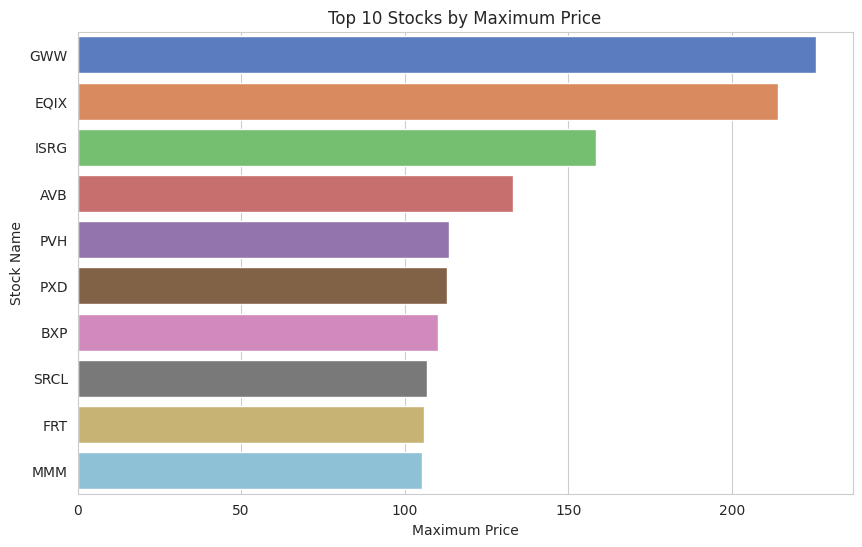

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:00...|  CMG|   375.27|   1|
|[2023-11-06 20:00...| AMZN|   265.83|   2|
|[2023-11-06 20:00...|  GWW|   251.07|   3|
|[2023-11-06 20:00...| ISRG| 167.6665|   4|
|[2023-11-06 20:00...|  ESS|   154.81|   5|
|[2023-11-06 20:00...|   GS|    149.5|   6|
|[2023-11-06 20:00...|   RE|   131.75|   7|
|[2023-11-06 20:00...|  FRT|   116.94|   8|
|[2023-11-06 20:00...|   PX|   113.62|   9|
|[2023-11-06 20:00...| ORLY|    111.3|  10|
|[2023-11-06 19:58...|GOOGL| 409.9095|   1|
|[2023-11-06 19:58...|  CMG|   362.18|   2|
|[2023-11-06 19:58...|   GS|   145.83|   3|
|[2023-11-06 19:58...|  BXP|   107.77|   4|
|[2023-11-06 19:58...| ULTA|    86.43|   5|
|[2023-11-06 19:58...|  OXY|     85.4|   6|
|[2023-11-06 19:58...|  SNA|     85.2|   7|
|[2023-11-06 19:58...|  ECL|    83.27|   8|
|[2023-11-06 19:58...| ANTM|    72.62|   9|
|[2023-11-06 19:58...|  SNI|    

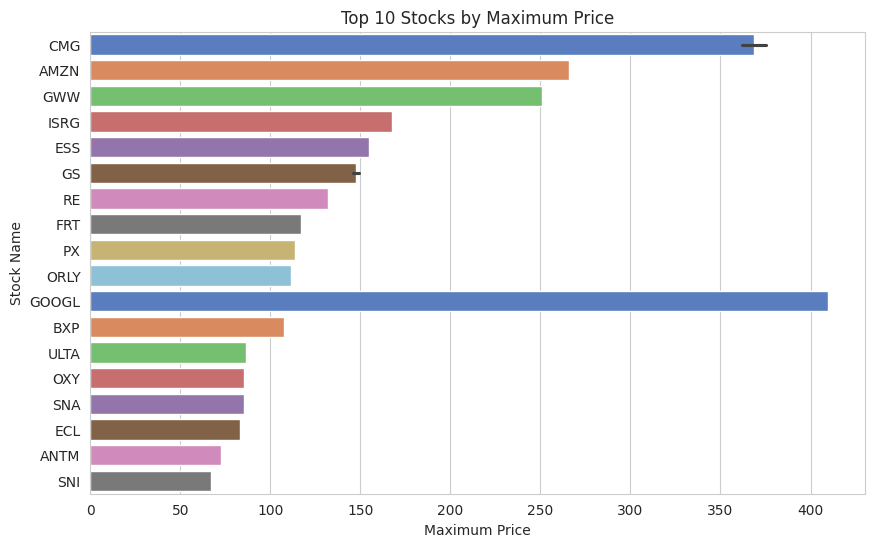

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:00...|PCLN|   805.77|   1|
|[2023-11-06 20:00...| GWW|    252.9|   2|
|[2023-11-06 20:00...| IBM|   208.59|   3|
|[2023-11-06 20:00...|EQIX|   188.66|   4|
|[2023-11-06 20:00...| ADS|    179.7|   5|
|[2023-11-06 20:00...| SPG|   171.99|   6|
|[2023-11-06 20:00...|  GS|    166.7|   7|
|[2023-11-06 20:00...| ESS|   156.26|   8|
|[2023-11-06 20:00...| PSA|   148.52|   9|
|[2023-11-06 20:00...| AVB|   132.88|  10|
+--------------------+----+---------+----+



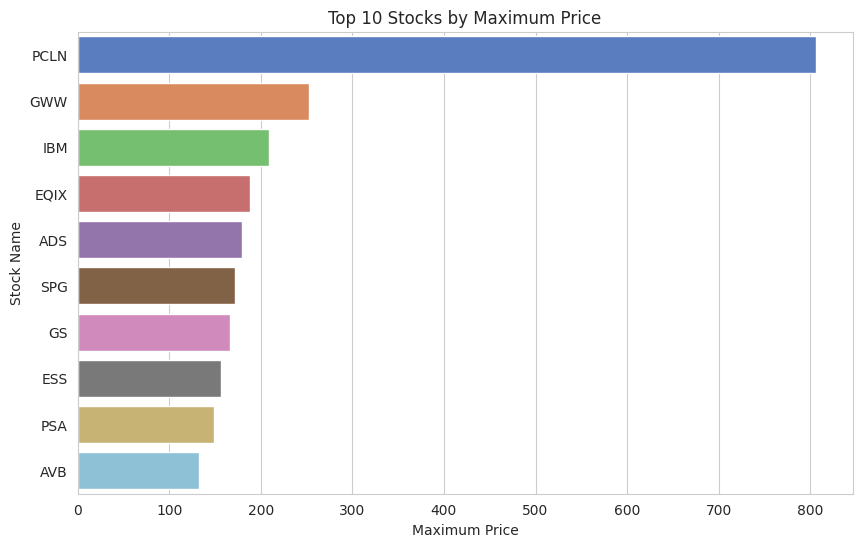

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:00...| BLK|   257.82|   1|
|[2023-11-06 20:00...|  RL|   180.52|   2|
|[2023-11-06 20:00...| AMG|   168.09|   3|
|[2023-11-06 20:00...| PSA|    159.0|   4|
|[2023-11-06 20:00...|  GS|   152.69|   5|
|[2023-11-06 20:00...| AGN|   121.25|   6|
|[2023-11-06 20:00...|PRGO|   119.14|   7|
|[2023-11-06 20:00...| MTB|    116.2|   8|
|[2023-11-06 20:00...| KSU|   108.71|   9|
|[2023-11-06 20:00...|ULTA|    99.04|  10|
+--------------------+----+---------+----+



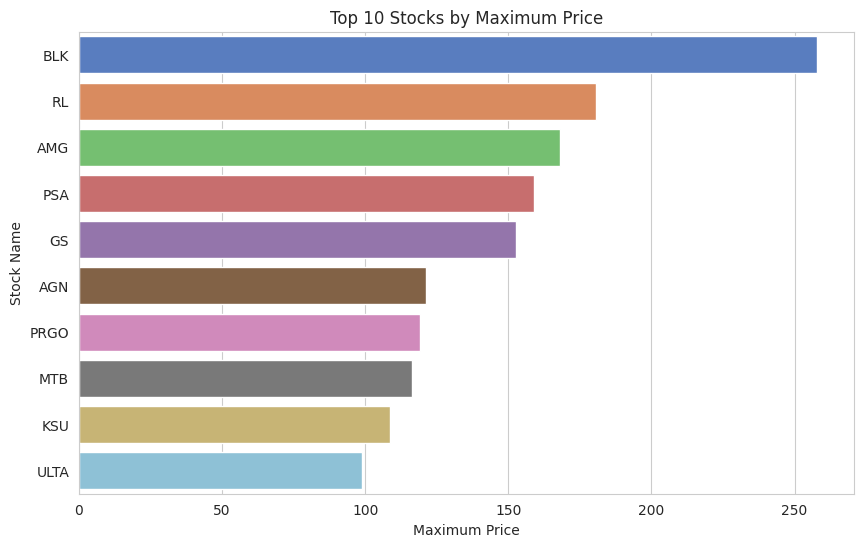

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:00...|GOOGL| 452.1717|   1|
|[2023-11-06 20:00...| REGN|   229.55|   2|
|[2023-11-06 20:00...|  AMG|   172.91|   3|
|[2023-11-06 20:00...|  ESS|   158.62|   4|
|[2023-11-06 20:00...|  COO|   126.39|   5|
|[2023-11-06 20:00...|  UTX|   106.45|   6|
|[2023-11-06 20:00...|  APD|   103.57|   7|
|[2023-11-06 20:00...|  KMB|    97.94|   8|
|[2023-11-06 20:00...|  ECL|     93.1|   9|
|[2023-11-06 20:00...|   CB|     92.4|  10|
+--------------------+-----+---------+----+



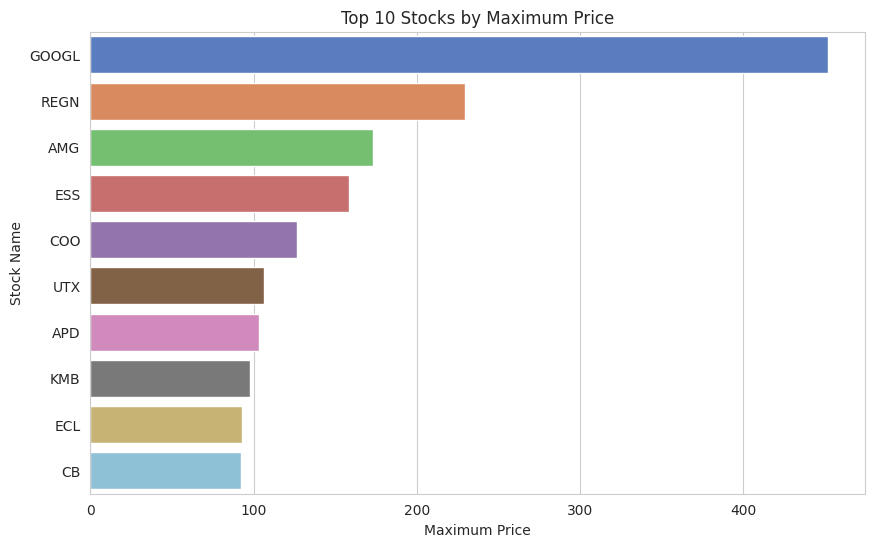

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:00...| PCLN|   979.23|   1|
|[2023-11-06 20:00...|GOOGL|  453.448|   2|
|[2023-11-06 20:00...| BIIB|   245.99|   3|
|[2023-11-06 20:00...|  PSA|   153.06|   4|
|[2023-11-06 20:00...|  CMI|    131.8|   5|
|[2023-11-06 20:00...| PRGO|   125.93|   6|
|[2023-11-06 20:00...| CHTR|   123.31|   7|
|[2023-11-06 20:00...|  MMM|   115.63|   8|
|[2023-11-06 20:00...|  BXP|   106.39|   9|
|[2023-11-06 20:00...|   LH|    97.75|  10|
+--------------------+-----+---------+----+



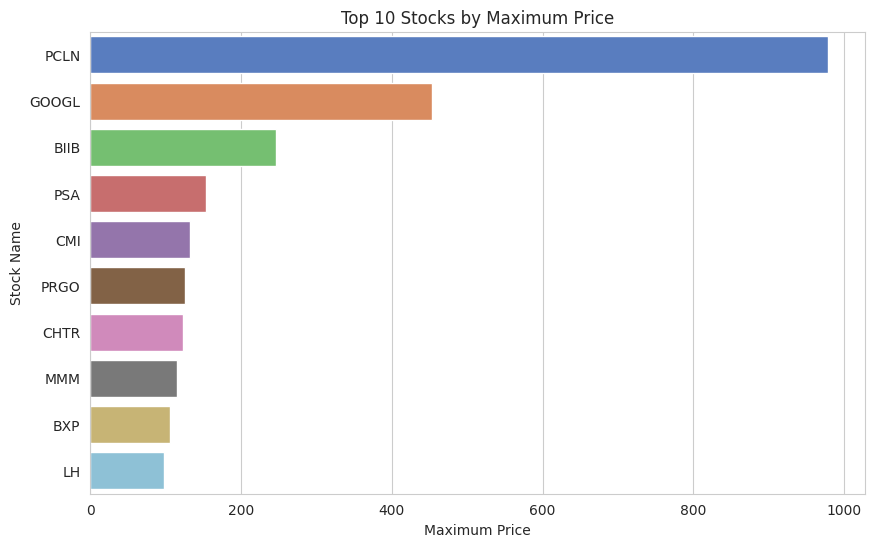

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:00...| SJM|   106.57|   1|
|[2023-11-06 20:00...| BDX|   101.77|   2|
|[2023-11-06 20:00...| DOV|    90.89|   3|
|[2023-11-06 20:00...| CCI|     71.0|   4|
|[2023-11-06 20:00...| SIG|     71.0|   4|
|[2023-11-06 20:00...| TGT|    64.54|   6|
|[2023-11-06 20:00...| CAH|    53.29|   7|
|[2023-11-06 20:00...| MET|    47.29|   8|
|[2023-11-06 20:00...| SCG|    46.51|   9|
|[2023-11-06 20:00...|EXPD|    44.65|  10|
|[2023-11-06 20:01...| ESS|   155.94|   1|
|[2023-11-06 20:01...| SPG|   150.98|   2|
|[2023-11-06 20:01...|ORLY|    127.5|   3|
|[2023-11-06 20:01...| LMT|   127.47|   4|
|[2023-11-06 20:01...|PRGO|   125.56|   5|
|[2023-11-06 20:01...| KSU|   112.65|   6|
|[2023-11-06 20:01...|ALXN|   106.27|   7|
|[2023-11-06 20:01...| FRT|   105.85|   8|
|[2023-11-06 20:01...| UTX|   103.44|   9|
|[2023-11-06 20:01...| ECL|    97.75|  10|
+----------

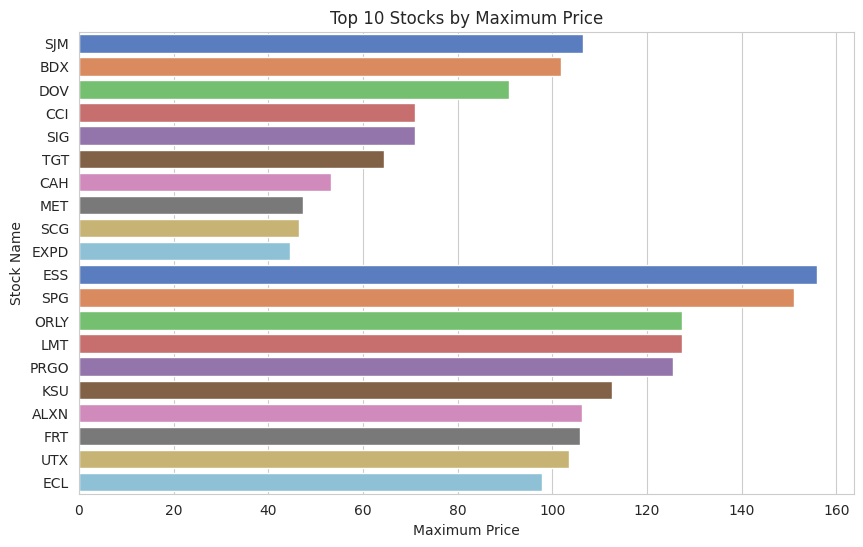

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:01...| AZO|   450.57|   1|
|[2023-11-06 20:01...| ADS|   244.89|   2|
|[2023-11-06 20:01...| IBM|   184.63|   3|
|[2023-11-06 20:01...|  RL|   171.97|   4|
|[2023-11-06 20:01...|WYNN|   159.86|   5|
|[2023-11-06 20:01...| TDG|   147.14|   6|
|[2023-11-06 20:01...| CMI|   136.19|   7|
|[2023-11-06 20:01...| MHK|   136.15|   8|
|[2023-11-06 20:01...|  BA|   133.75|   9|
|[2023-11-06 20:01...|PRGO|   130.64|  10|
+--------------------+----+---------+----+



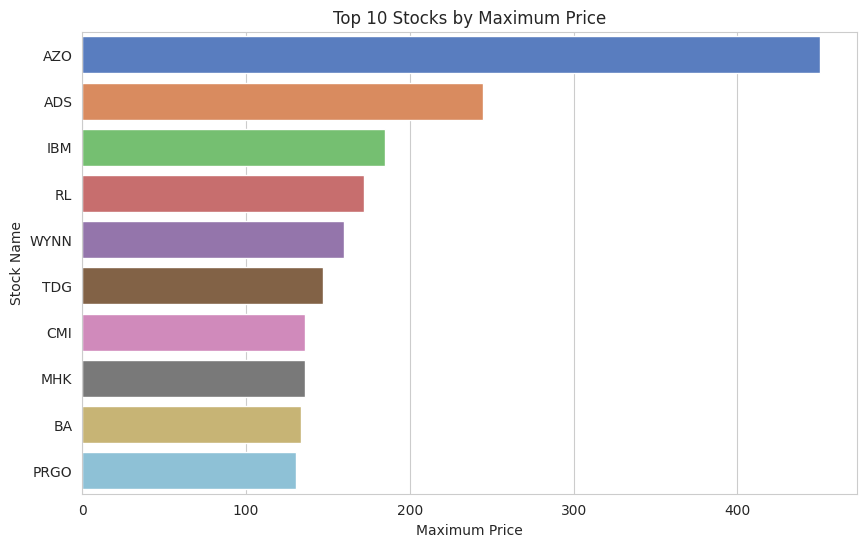

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:01...|PCLN|  1164.23|   1|
|[2023-11-06 20:01...|REGN|   270.17|   2|
|[2023-11-06 20:01...| MTD|   247.97|   3|
|[2023-11-06 20:01...| MCK|   163.43|   4|
|[2023-11-06 20:01...|WYNN|   162.72|   5|
|[2023-11-06 20:01...|  RE|   157.52|   6|
|[2023-11-06 20:01...|CHTR|   131.88|   7|
|[2023-11-06 20:01...|  PH|   118.39|   8|
|[2023-11-06 20:01...|SRCL|   115.16|   9|
|[2023-11-06 20:01...| APD|    109.1|  10|
+--------------------+----+---------+----+



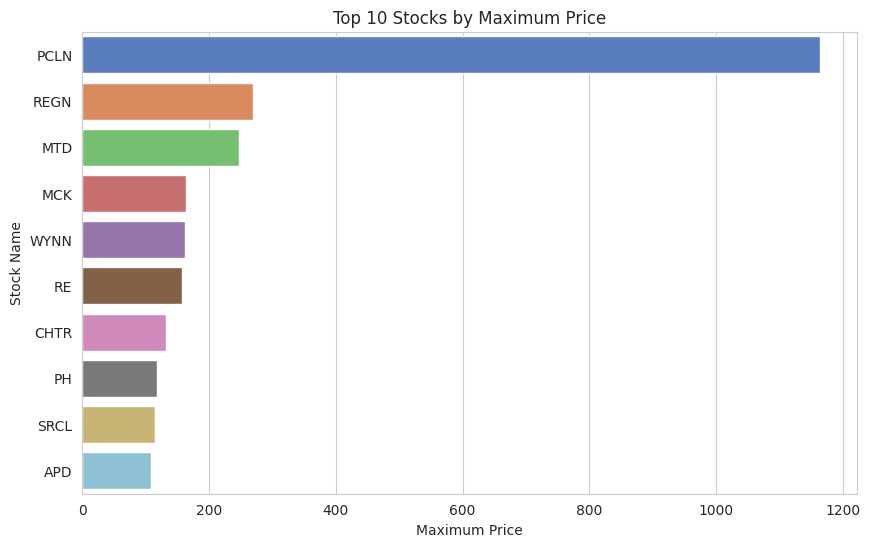

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:01...| CMG|   536.84|   1|
|[2023-11-06 20:01...|BIIB|   275.83|   2|
|[2023-11-06 20:01...| ADS|   256.35|   3|
|[2023-11-06 20:01...| MTD|   251.63|   4|
|[2023-11-06 20:01...| WHR|   158.05|   5|
|[2023-11-06 20:01...|  RE|   147.64|   6|
|[2023-11-06 20:01...| LMT|   145.17|   7|
|[2023-11-06 20:01...| MHK|   143.24|   8|
|[2023-11-06 20:01...| ROP|   137.75|   9|
|[2023-11-06 20:01...|  PX|   132.25|  10|
+--------------------+----+---------+----+



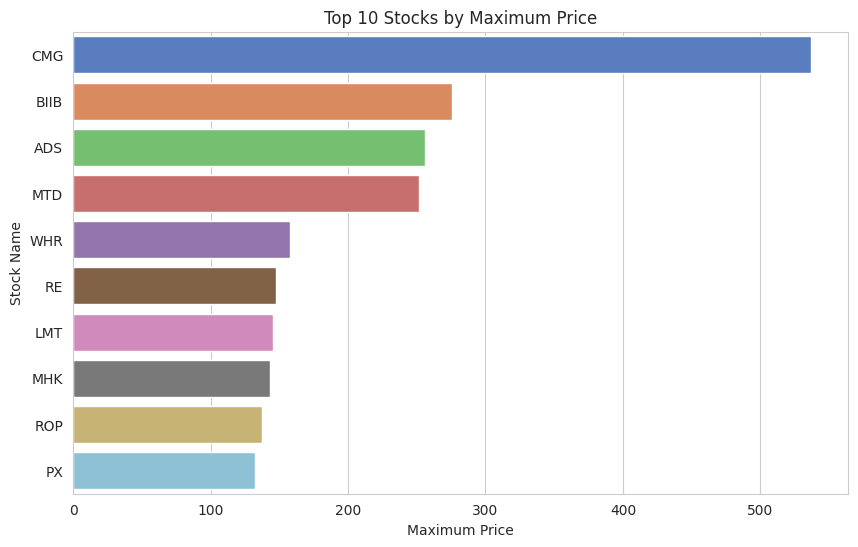

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:02...| HII|    98.27|   1|
|[2023-11-06 20:01...| CMG|    490.0|   1|
|[2023-11-06 20:01...| PXD|   171.78|   2|
|[2023-11-06 20:01...|  GS|   162.78|   3|
|[2023-11-06 20:01...|  RL|   157.35|   4|
|[2023-11-06 20:01...|  PX|   128.26|   5|
|[2023-11-06 20:01...| COO|   124.73|   6|
|[2023-11-06 20:01...| PVH|   118.07|   7|
|[2023-11-06 20:01...| UTX|   114.36|   8|
|[2023-11-06 20:01...|  PH|   111.93|   9|
|[2023-11-06 20:01...| AMP|   106.32|  10|
+--------------------+----+---------+----+



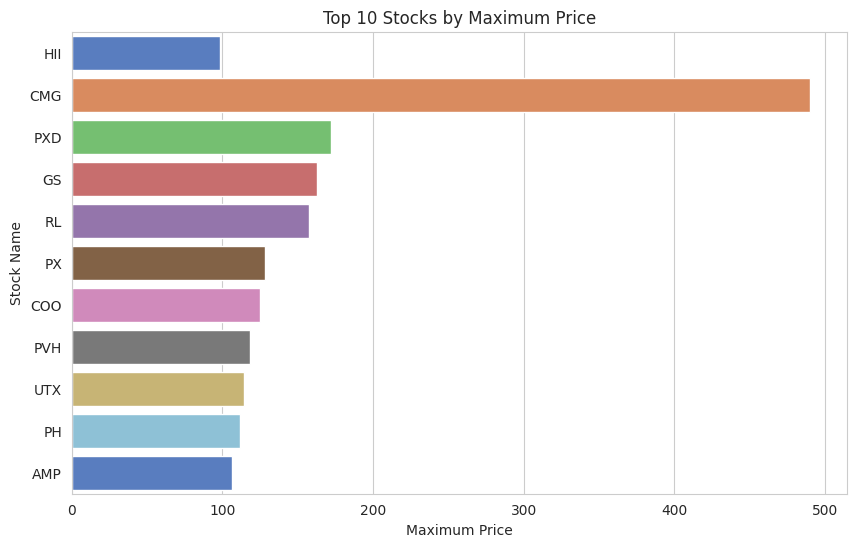

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:02...|REGN|   343.33|   1|
|[2023-11-06 20:02...| BLK|   306.07|   2|
|[2023-11-06 20:02...| GWW|   250.68|   3|
|[2023-11-06 20:02...| MTD|   247.09|   4|
|[2023-11-06 20:02...| SHW|   205.82|   5|
|[2023-11-06 20:02...|EQIX|   190.45|   6|
|[2023-11-06 20:02...|ALXN|   179.77|   7|
|[2023-11-06 20:02...|  RL|   160.15|   8|
|[2023-11-06 20:02...|ORLY|   153.61|   9|
|[2023-11-06 20:02...|  RE|   148.04|  10|
+--------------------+----+---------+----+



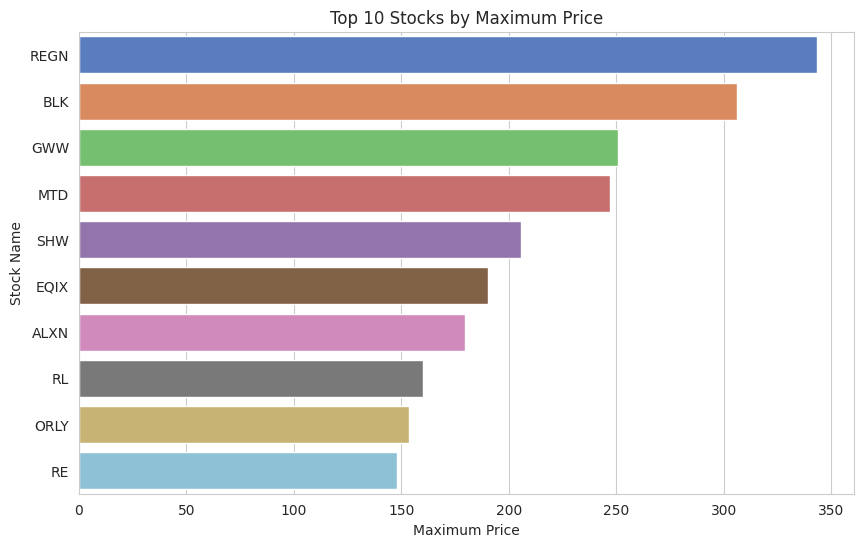

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:02...| AZO|    535.0|   1|
|[2023-11-06 20:02...| BLK|   298.21|   2|
|[2023-11-06 20:02...| SHW|   190.59|   3|
|[2023-11-06 20:02...| PSA|   169.75|   4|
|[2023-11-06 20:02...| MCK|    165.8|   5|
|[2023-11-06 20:02...| MHK|    136.7|   6|
|[2023-11-06 20:02...| AAP|   126.96|   7|
|[2023-11-06 20:02...| NOC|   125.55|   8|
|[2023-11-06 20:02...| CVX|    117.8|   9|
|[2023-11-06 20:02...| LLL|    117.0|  10|
+--------------------+----+---------+----+



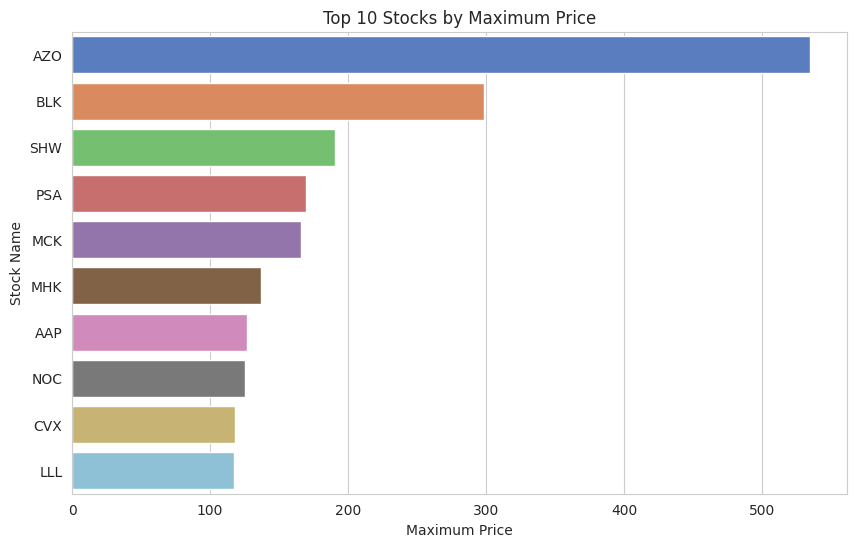

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:02...|  CMG|   498.89|   1|
|[2023-11-06 20:02...|   RL|   155.15|   2|
|[2023-11-06 20:02...|  MHK|   133.67|   3|
|[2023-11-06 20:02...|  PVH|   131.06|   4|
|[2023-11-06 20:02...|BRK.B|   126.92|   5|
|[2023-11-06 20:02...|  AAP|   121.48|   6|
|[2023-11-06 20:02...|  SNA|   115.47|   7|
|[2023-11-06 20:02...|   GD|    112.0|   8|
|[2023-11-06 20:02...|  CAT|    106.5|   9|
|[2023-11-06 20:02...| FFIV|   103.85|  10|
+--------------------+-----+---------+----+



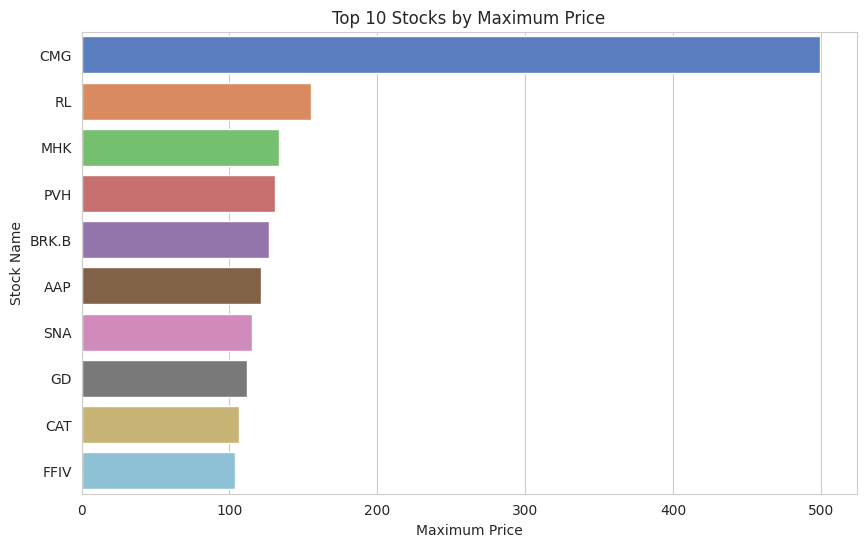

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:02...| CMG|    506.5|   1|
|[2023-11-06 20:02...|REGN|    308.0|   2|
|[2023-11-06 20:02...| SHW|   202.83|   3|
|[2023-11-06 20:02...| TDG|   188.03|   4|
|[2023-11-06 20:02...| IBM|   186.47|   5|
|[2023-11-06 20:02...| ROP|   141.29|   6|
|[2023-11-06 20:02...| PVH|   131.08|   7|
|[2023-11-06 20:02...| AYI|   130.62|   8|
|[2023-11-06 20:02...| CVX|   125.13|   9|
|[2023-11-06 20:02...| HUM|   123.78|  10|
+--------------------+----+---------+----+



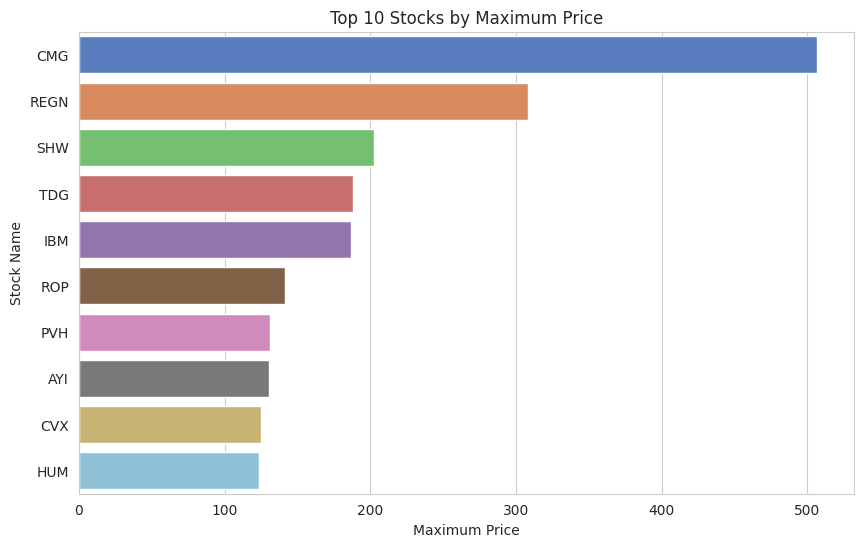

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:02...| ADS|   283.08|   1|
|[2023-11-06 20:02...| AYI|   133.43|   2|
|[2023-11-06 20:02...| MLM|   131.31|   3|
|[2023-11-06 20:02...|  PH|   122.89|   4|
|[2023-11-06 20:02...| MTB|    121.5|   5|
|[2023-11-06 20:02...|SRCL|    119.0|   6|
|[2023-11-06 20:02...| BDX|    118.2|   7|
|[2023-11-06 20:02...| KMB|   111.97|   8|
|[2023-11-06 20:02...| ECL|   111.18|   9|
|[2023-11-06 20:02...|ANTM|   110.67|  10|
|[2023-11-06 20:04...|ALXN|   164.33|   1|
|[2023-11-06 20:04...| JNJ|   103.53|   2|
|[2023-11-06 20:04...| COF|    85.05|   3|
|[2023-11-06 20:04...| COL|     79.0|   4|
|[2023-11-06 20:04...| PKG|    68.28|   5|
|[2023-11-06 20:04...| VMC|    64.47|   6|
|[2023-11-06 20:04...| RHT|    55.03|   7|
|[2023-11-06 20:04...| RJF|    49.91|   8|
|[2023-11-06 20:04...|MCHP|    48.83|   9|
|[2023-11-06 20:04...| APH|   48.375|  10|
+----------

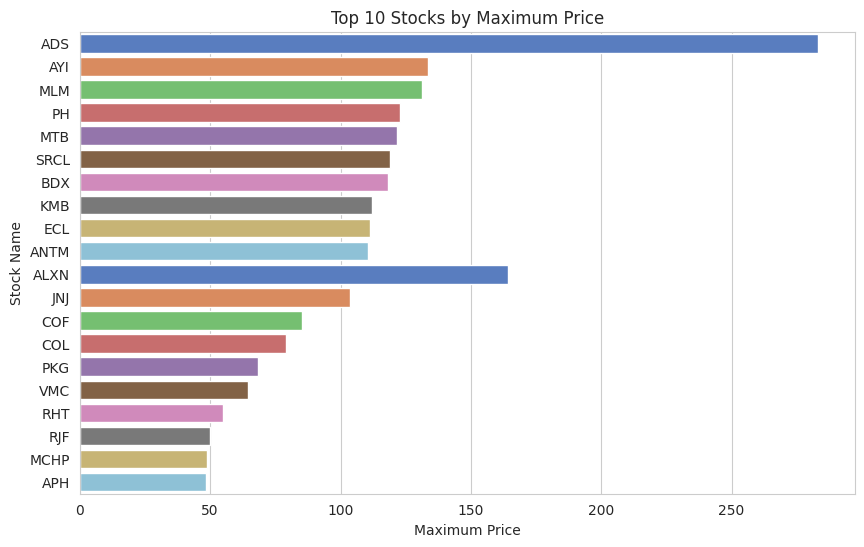

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:04...|GOOGL|    599.7|   1|
|[2023-11-06 20:04...| EQIX|    208.8|   2|
|[2023-11-06 20:04...|  MCK|    190.7|   3|
|[2023-11-06 20:04...|   RE|   160.12|   4|
|[2023-11-06 20:04...| ORLY|   150.18|   5|
|[2023-11-06 20:04...|  AVB|   146.01|   6|
|[2023-11-06 20:04...|  SNA|   123.84|   7|
|[2023-11-06 20:04...| FFIV|   115.32|   8|
|[2023-11-06 20:04...|  BDX|   115.13|   9|
|[2023-11-06 20:04...| ANTM|    111.0|  10|
+--------------------+-----+---------+----+



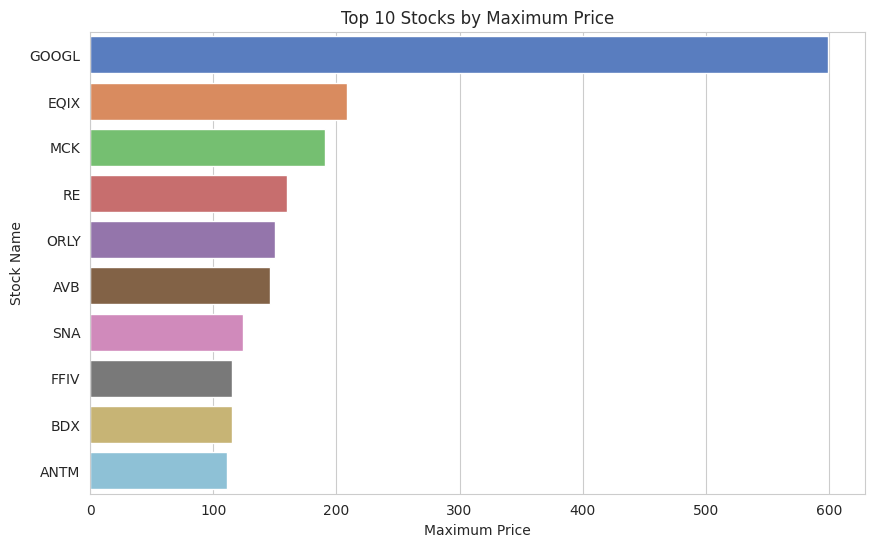

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:04...|  CMG|    684.5|   1|
|[2023-11-06 20:04...|GOOGL|    590.0|   2|
|[2023-11-06 20:04...| REGN|   349.41|   3|
|[2023-11-06 20:04...| EQIX|   215.45|   4|
|[2023-11-06 20:04...|  PXD|   209.35|   5|
|[2023-11-06 20:04...|  IBM|   190.34|   6|
|[2023-11-06 20:04...| WYNN|   182.58|   7|
|[2023-11-06 20:04...| ILMN|   175.26|   8|
|[2023-11-06 20:04...| CHTR|   157.21|   9|
|[2023-11-06 20:04...|  ROP|   151.34|  10|
+--------------------+-----+---------+----+



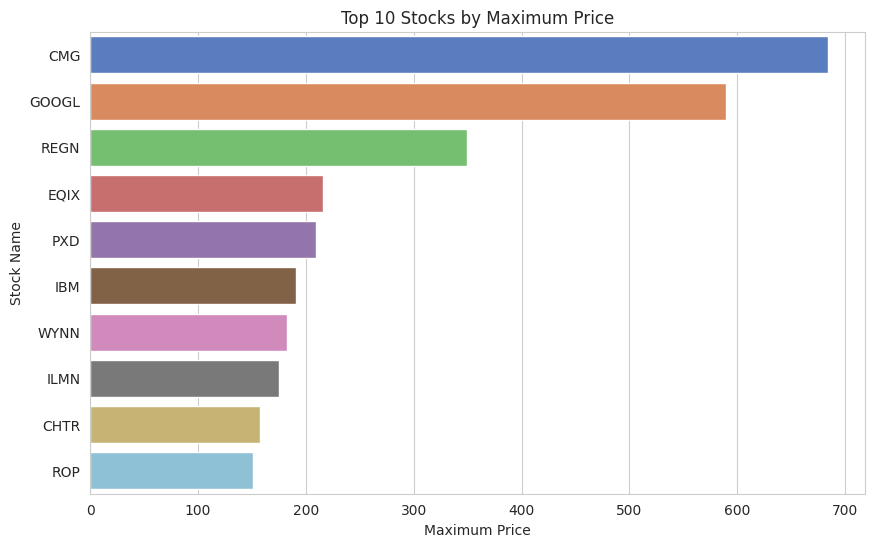

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:04...|PCLN|  1181.43|   1|
|[2023-11-06 20:04...| CMG|    663.8|   2|
|[2023-11-06 20:04...| GWW|   251.42|   3|
|[2023-11-06 20:04...| AGN|   240.11|   4|
|[2023-11-06 20:04...| SHW|   220.47|   5|
|[2023-11-06 20:04...|  RE|   161.46|   6|
|[2023-11-06 20:04...|CHTR|   150.14|   7|
|[2023-11-06 20:04...| APD|   128.96|   8|
|[2023-11-06 20:04...| NOC|    126.1|   9|
|[2023-11-06 20:04...| AYI|    125.0|  10|
+--------------------+----+---------+----+



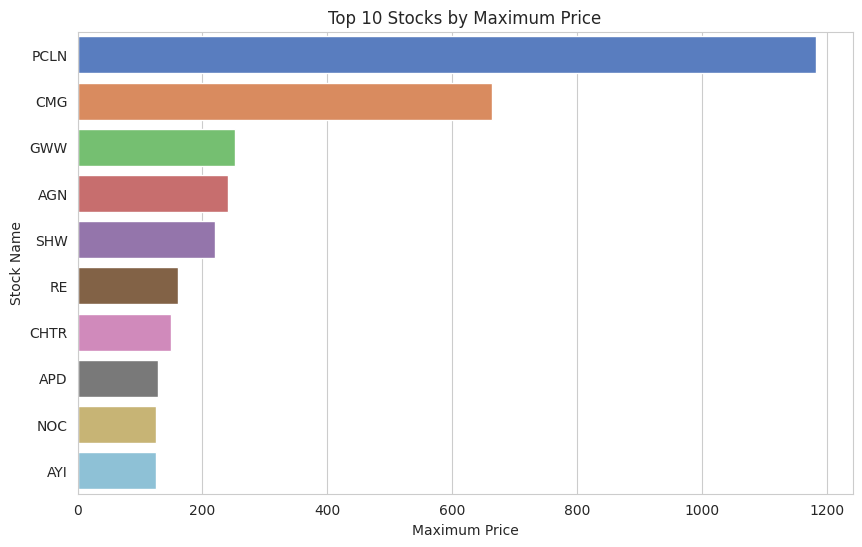

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:04...|REGN|   371.01|   1|
|[2023-11-06 20:04...| MCK|   199.96|   2|
|[2023-11-06 20:04...| ESS|   194.06|   3|
|[2023-11-06 20:04...|  GS|   190.66|   4|
|[2023-11-06 20:04...| LMT|    187.0|   5|
|[2023-11-06 20:04...| PSA|   177.01|   6|
|[2023-11-06 20:04...| FDX|   170.99|   7|
|[2023-11-06 20:04...| SNA|   135.95|   8|
|[2023-11-06 20:04...| BDX|   129.75|   9|
|[2023-11-06 20:04...|COST|   128.58|  10|
+--------------------+----+---------+----+



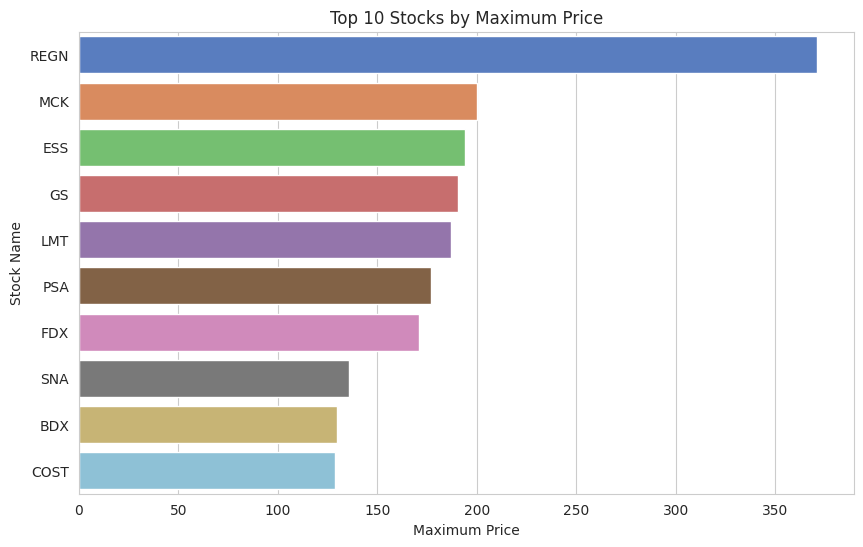

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:04...| BLK|    347.0|   1|
|[2023-11-06 20:04...| AMG|   201.27|   2|
|[2023-11-06 20:04...|ORLY|   179.83|   3|
|[2023-11-06 20:04...|  GD|   142.21|   4|
|[2023-11-06 20:04...|COST|   139.33|   5|
|[2023-11-06 20:04...| AYI|   137.05|   6|
|[2023-11-06 20:04...| KSU|   125.54|   7|
|[2023-11-06 20:04...| XEC|   120.74|   8|
|[2023-11-06 20:04...| SIG|   119.72|   9|
|[2023-11-06 20:04...| CVX|   118.79|  10|
|[2023-11-06 20:05...|CELG|   116.37|   1|
|[2023-11-06 20:05...| VNO|   112.06|   2|
|[2023-11-06 20:05...| HON|    99.85|   3|
|[2023-11-06 20:05...| DTE|    83.36|   4|
|[2023-11-06 20:05...|ANSS|     83.3|   5|
|[2023-11-06 20:05...| OMC|     78.0|   6|
|[2023-11-06 20:05...| TAP|    74.55|   7|
|[2023-11-06 20:05...|NTRS|     68.0|   8|
|[2023-11-06 20:05...|  EW|   66.325|   9|
|[2023-11-06 20:05...| EIX|     64.5|  10|
+----------

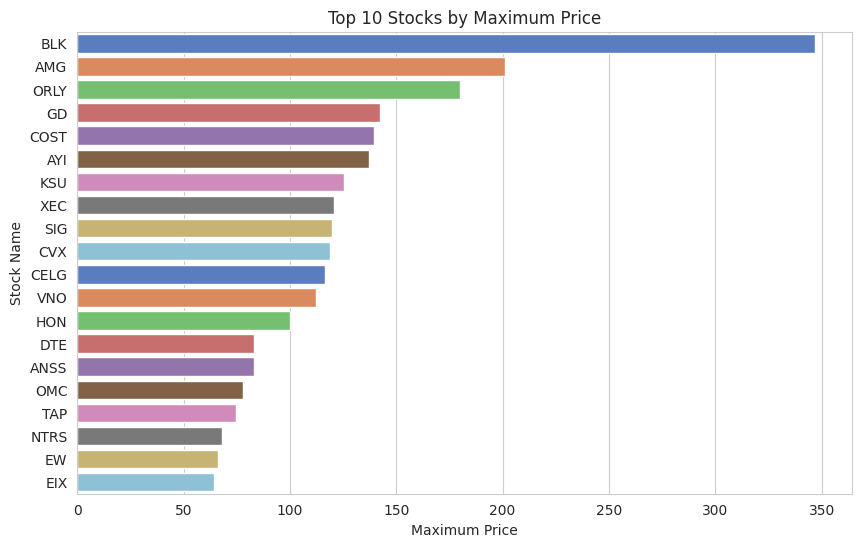

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:05...|GOOG|   504.76|   1|
|[2023-11-06 20:05...| MTD|   299.67|   2|
|[2023-11-06 20:05...| ADS|   290.79|   3|
|[2023-11-06 20:05...| SHW|    264.5|   4|
|[2023-11-06 20:05...| SPG|   196.88|   5|
|[2023-11-06 20:05...| LMT|   194.15|   6|
|[2023-11-06 20:05...| FDX|    174.2|   7|
|[2023-11-06 20:05...| MMM|   167.34|   8|
|[2023-11-06 20:05...| AAP|   157.28|   9|
|[2023-11-06 20:05...|PRGO|   153.87|  10|
+--------------------+----+---------+----+



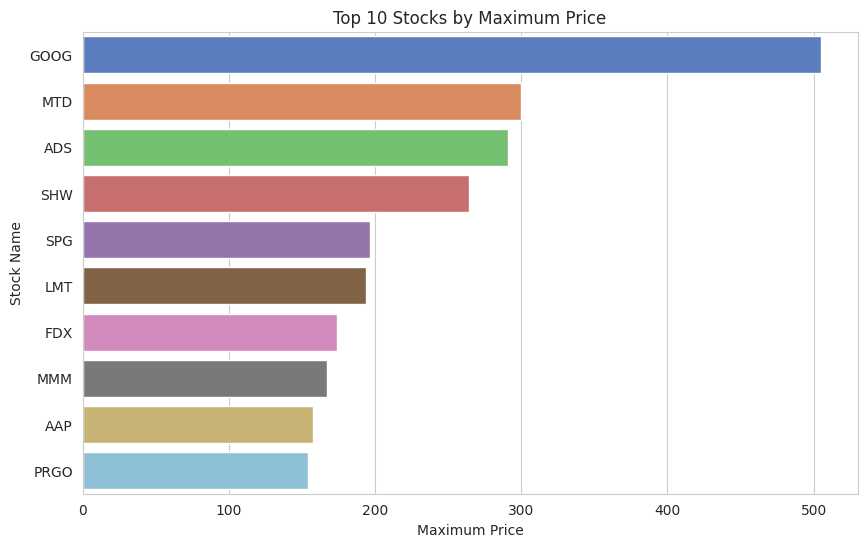

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:05...| BLK|   374.89|   1|
|[2023-11-06 20:05...| TDG|   206.26|   2|
|[2023-11-06 20:05...| SPG|   203.17|   3|
|[2023-11-06 20:05...|ORLY|   191.65|   4|
|[2023-11-06 20:05...| LMT|   188.41|   5|
|[2023-11-06 20:05...|  GS|   176.01|   6|
|[2023-11-06 20:05...| AVB|    173.8|   7|
|[2023-11-06 20:05...| NOC|    153.8|   8|
|[2023-11-06 20:05...|WYNN|   146.84|   9|
|[2023-11-06 20:05...| FRT|   142.76|  10|
+--------------------+----+---------+----+



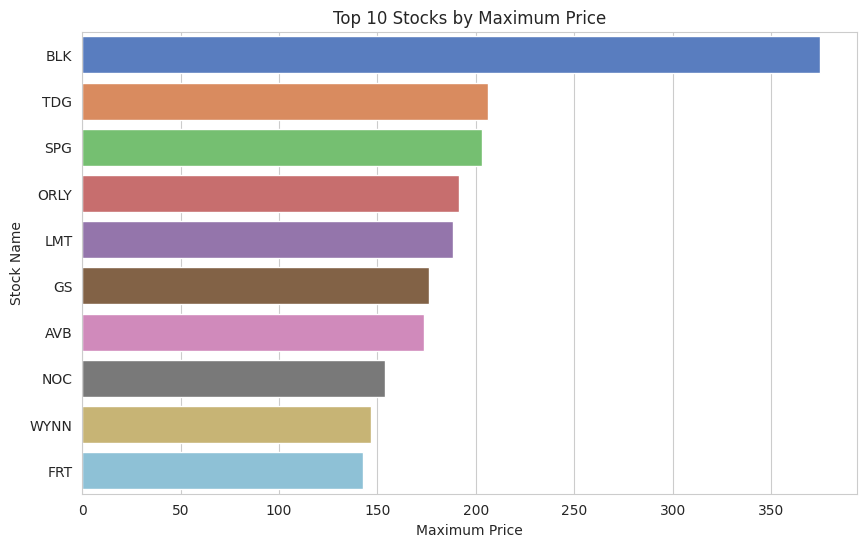

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:05...|  CMG|   670.59|   1|
|[2023-11-06 20:05...|GOOGL|   558.15|   2|
|[2023-11-06 20:05...|  AGN|    308.5|   3|
|[2023-11-06 20:05...| EQIX|   227.89|   4|
|[2023-11-06 20:05...|  FDX|   176.98|   5|
|[2023-11-06 20:05...|   BA|    151.0|   6|
|[2023-11-06 20:05...| WYNN|   143.34|   7|
|[2023-11-06 20:05...|   RL|   137.48|   8|
|[2023-11-06 20:05...|  MON|   123.82|   9|
|[2023-11-06 20:05...|  UNP|   117.37|  10|
+--------------------+-----+---------+----+



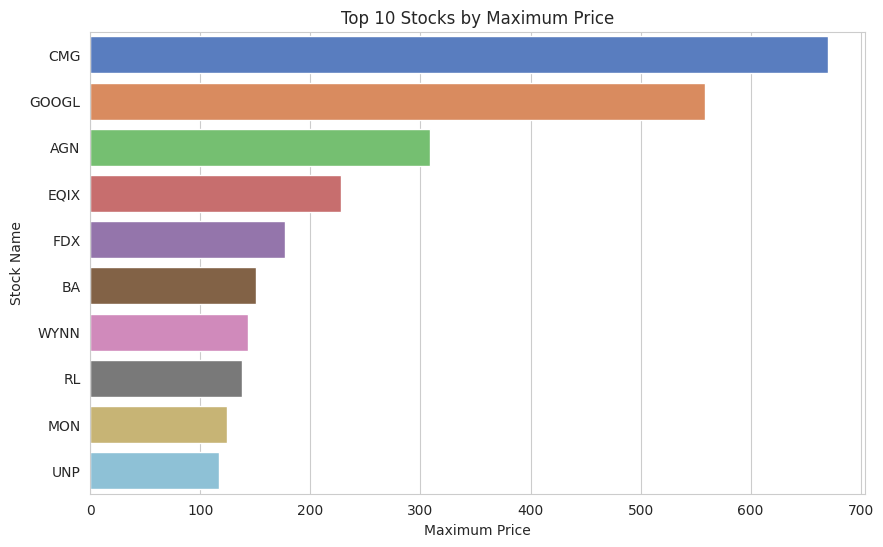

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:05...| GOOG|    553.0|   1|
|[2023-11-06 20:05...| REGN|   434.25|   2|
|[2023-11-06 20:05...|  SHW|   284.29|   3|
|[2023-11-06 20:05...|  LMT|   203.46|   4|
|[2023-11-06 20:05...|   GS|   186.52|   5|
|[2023-11-06 20:05...| ISRG| 167.6765|   6|
|[2023-11-06 20:05...|  AYI|   166.07|   7|
|[2023-11-06 20:05...| ANTM|    155.0|   8|
|[2023-11-06 20:05...|BRK.B|   143.02|   9|
|[2023-11-06 20:05...|  MLM|   142.74|  10|
+--------------------+-----+---------+----+



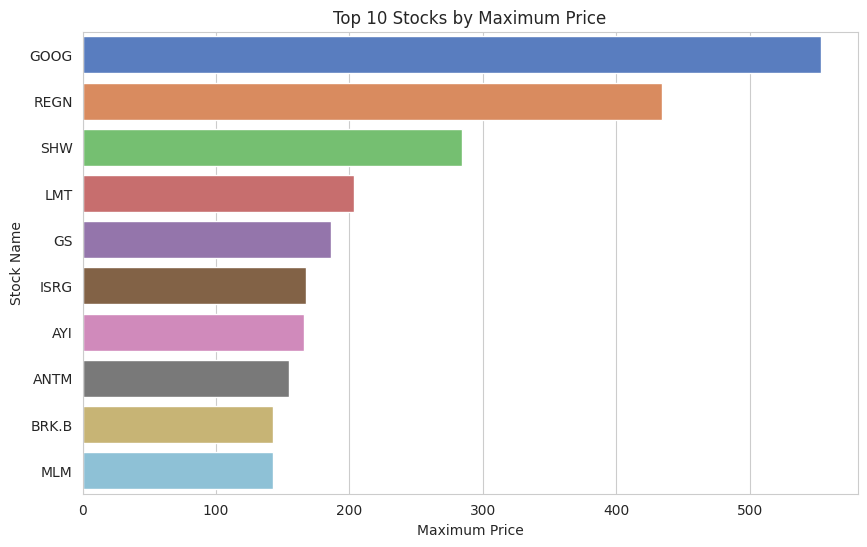

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:06...|  CMG|   637.44|   1|
|[2023-11-06 20:06...|  AGN|   298.15|   2|
|[2023-11-06 20:06...|   GS|   202.55|   3|
|[2023-11-06 20:06...| ISRG| 167.7732|   4|
|[2023-11-06 20:06...|   BA|   144.94|   5|
|[2023-11-06 20:06...| SRCL|   138.41|   6|
|[2023-11-06 20:06...|  TMO|    130.0|   7|
|[2023-11-06 20:06...| AAPL|   128.38|   8|
|[2023-11-06 20:06...|  MTB|   122.94|   9|
|[2023-11-06 20:06...|  DIS|   109.69|  10|
|[2023-11-06 20:05...|GOOGL|   550.51|   1|
|[2023-11-06 20:05...|  MCK|   225.24|   2|
|[2023-11-06 20:05...| CHTR|   190.17|   3|
|[2023-11-06 20:05...| ALXN|    185.6|   4|
|[2023-11-06 20:05...|  PXD|   175.74|   5|
|[2023-11-06 20:05...|  ROP|   168.23|   6|
|[2023-11-06 20:05...|BRK.B|   141.95|   7|
|[2023-11-06 20:05...|  TMO|  126.495|   8|
|[2023-11-06 20:05...|  ROK|   121.48|   9|
|[2023-11-06 20:05...|  ZBH|   1

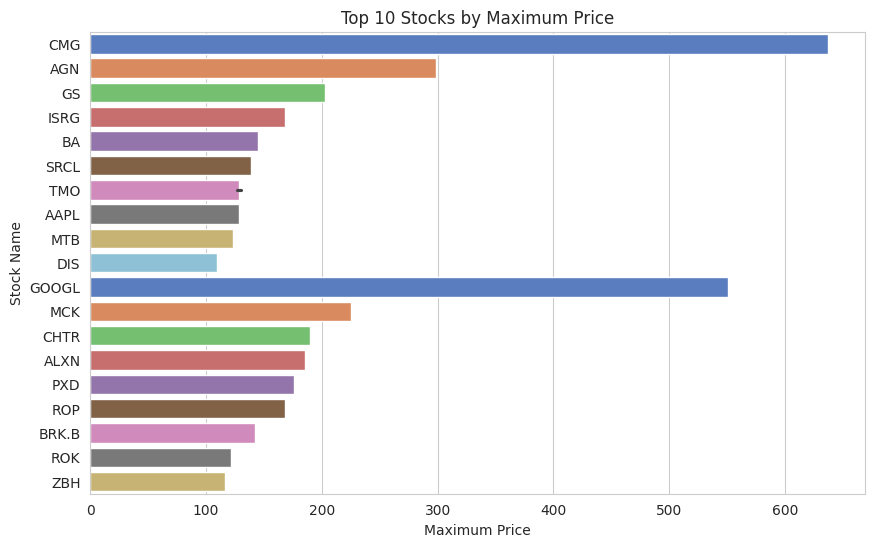

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:06...|AMZN|   429.66|   1|
|[2023-11-06 20:06...| MTD|   331.18|   2|
|[2023-11-06 20:06...| AGN|   306.92|   3|
|[2023-11-06 20:06...| GWW|    236.2|   4|
|[2023-11-06 20:06...|ILMN|   205.78|   5|
|[2023-11-06 20:06...| MHK|   188.06|   6|
|[2023-11-06 20:06...| COO|   182.79|   7|
|[2023-11-06 20:06...| ROP|   175.83|   8|
|[2023-11-06 20:06...| FDX|   173.87|   9|
|[2023-11-06 20:06...|CHTR|   172.86|  10|
+--------------------+----+---------+----+



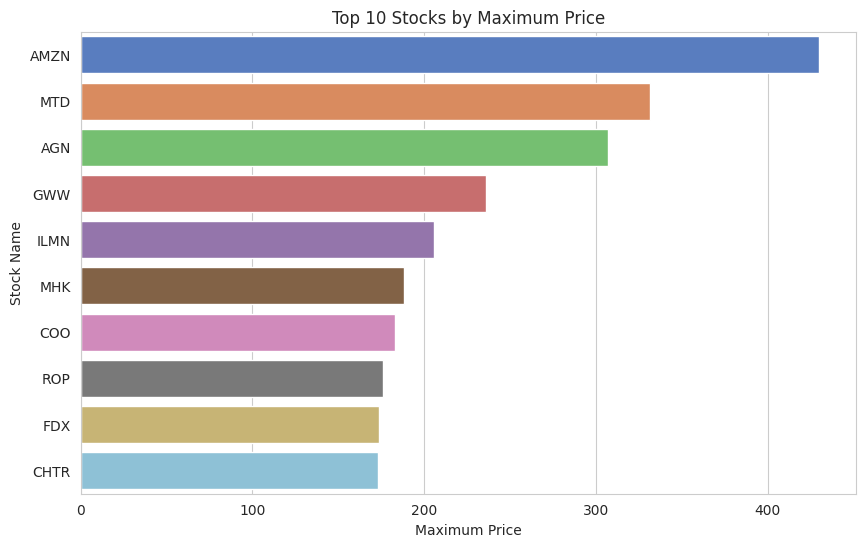

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:06...|GOOG|   525.01|   1|
|[2023-11-06 20:06...|REGN|   522.16|   2|
|[2023-11-06 20:06...| BLK|    353.1|   3|
|[2023-11-06 20:06...| MTD|    342.0|   4|
|[2023-11-06 20:06...|  RE|   190.29|   5|
|[2023-11-06 20:06...| COO|   176.89|   6|
|[2023-11-06 20:06...| SPG|   173.86|   7|
|[2023-11-06 20:06...|ANTM|    156.6|   8|
|[2023-11-06 20:06...| APD|    144.3|   9|
|[2023-11-06 20:06...|VRTX|    130.5|  10|
+--------------------+----+---------+----+



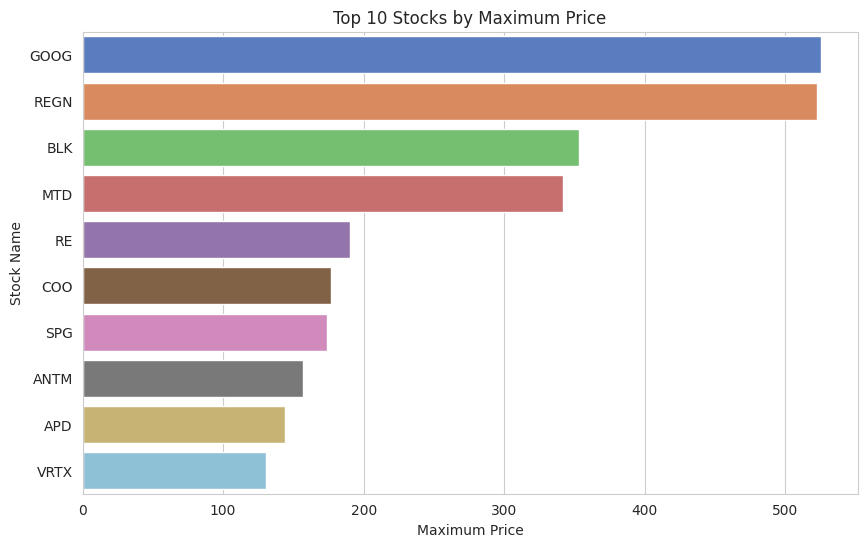

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:06...| BLK|   335.47|   1|
|[2023-11-06 20:06...| MTD|    334.0|   2|
|[2023-11-06 20:06...|BIIB|    333.0|   3|
|[2023-11-06 20:06...| ADS|   269.14|   4|
|[2023-11-06 20:06...|ALXN|   205.11|   5|
|[2023-11-06 20:06...| AMG|   204.06|   6|
|[2023-11-06 20:06...| WHR|   173.49|   7|
|[2023-11-06 20:06...| BDX|   146.58|   8|
|[2023-11-06 20:06...|COST|   146.36|   9|
|[2023-11-06 20:06...|CELG|   129.73|  10|
+--------------------+----+---------+----+



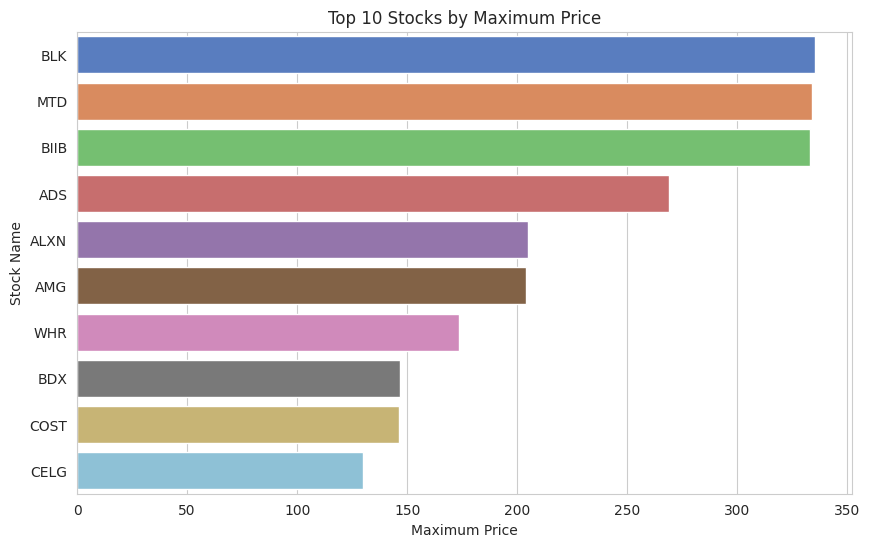

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:06...|  AZO|   737.85|   1|
|[2023-11-06 20:06...|GOOGL|   655.63|   2|
|[2023-11-06 20:06...| AMZN|   534.62|   3|
|[2023-11-06 20:06...|  MTD|   297.64|   4|
|[2023-11-06 20:06...|  ADS|   254.99|   5|
|[2023-11-06 20:06...|  TDG|   226.34|   6|
|[2023-11-06 20:06...|  AYI|   198.59|   7|
|[2023-11-06 20:06...|   GS|    185.0|   8|
|[2023-11-06 20:06...|  WHR|   166.45|   9|
|[2023-11-06 20:06...|  NOC|   165.27|  10|
+--------------------+-----+---------+----+



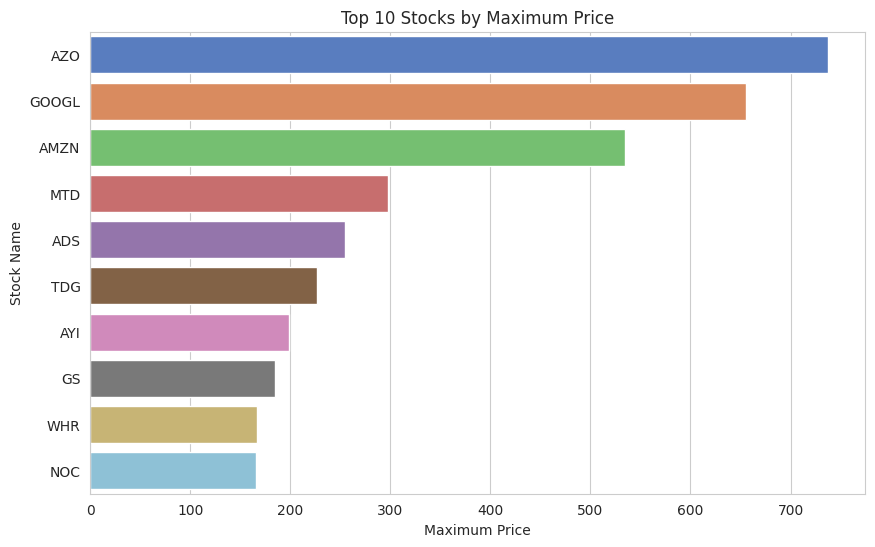

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:06...|  MTD|   285.23|   1|
|[2023-11-06 20:06...|  ADS|   252.35|   2|
|[2023-11-06 20:06...| CHTR|   190.33|   3|
|[2023-11-06 20:06...|  AVB|   170.81|   4|
|[2023-11-06 20:06...|BRK.B|   130.03|   5|
|[2023-11-06 20:06...|  WAT|   115.11|   6|
|[2023-11-06 20:06...|   HD|   114.21|   7|
|[2023-11-06 20:06...|  PVH|   112.63|   8|
|[2023-11-06 20:06...|  HII|   109.85|   9|
|[2023-11-06 20:06...|   PX|   104.02|  10|
|[2023-11-06 20:08...|  BLK|   318.69|   1|
|[2023-11-06 20:08...|  ESS|   229.84|   2|
|[2023-11-06 20:08...|  TDG|   220.06|   3|
|[2023-11-06 20:08...|  LMT|   212.28|   4|
|[2023-11-06 20:08...|  MHK|   196.51|   5|
|[2023-11-06 20:08...|  MCK|   194.95|   6|
|[2023-11-06 20:08...|  NOC|    176.7|   7|
|[2023-11-06 20:08...| ULTA|   163.81|   8|
|[2023-11-06 20:08...|  SNA|    160.1|   9|
|[2023-11-06 20:08...| SRCL|   1

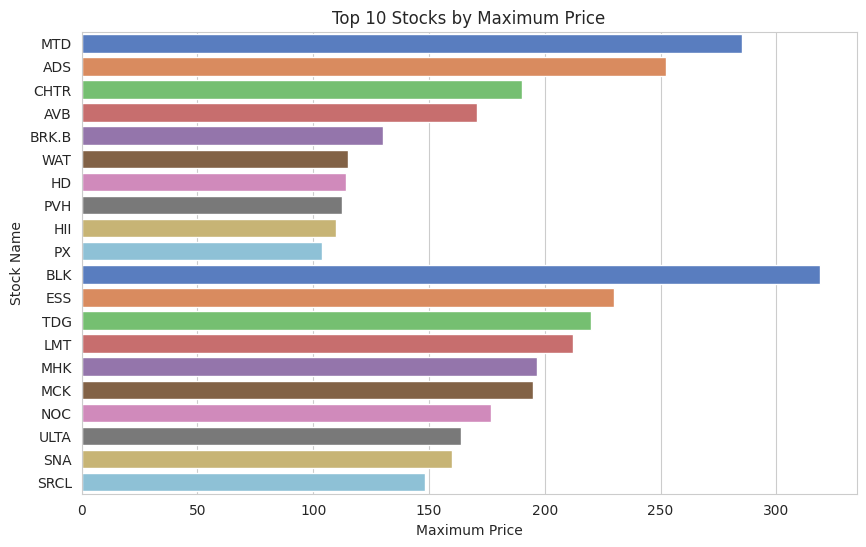

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:08...| BLK|   339.91|   1|
|[2023-11-06 20:08...| PSA|   229.64|   2|
|[2023-11-06 20:08...| TDG|   228.95|   3|
|[2023-11-06 20:08...| AYI|    218.9|   4|
|[2023-11-06 20:08...|  GS|   198.29|   5|
|[2023-11-06 20:08...| AMG|   169.84|   6|
|[2023-11-06 20:08...|PRGO|   165.15|   7|
|[2023-11-06 20:08...| MLM|   159.61|   8|
|[2023-11-06 20:08...| BDX|    150.8|   9|
|[2023-11-06 20:08...|  GD|   148.25|  10|
+--------------------+----+---------+----+



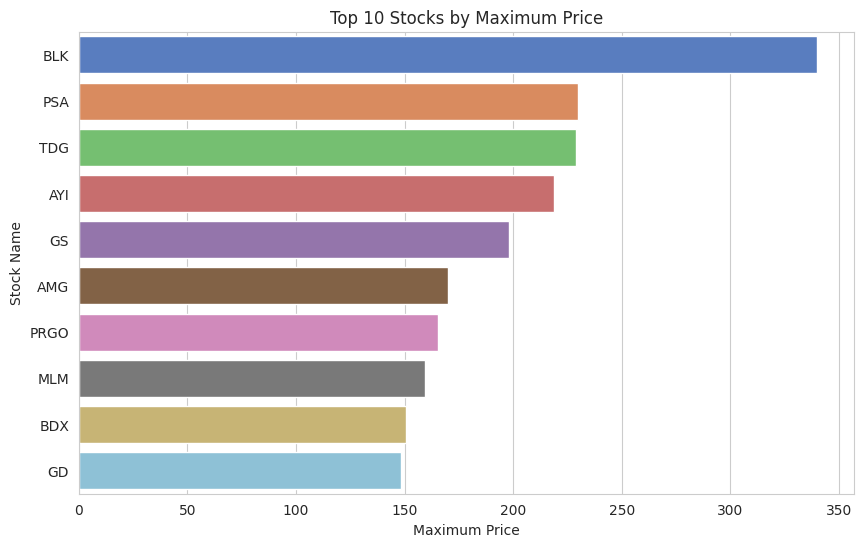

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:08...|GOOG|    752.0|   1|
|[2023-11-06 20:08...| CMG|   583.28|   2|
|[2023-11-06 20:08...| SHW|   269.67|   3|
|[2023-11-06 20:08...| PSA|   241.38|   4|
|[2023-11-06 20:08...| LMT|   219.27|   5|
|[2023-11-06 20:08...| TDG|   217.79|   6|
|[2023-11-06 20:08...| MCK|   191.04|   7|
|[2023-11-06 20:08...|ISRG| 178.2298|   8|
|[2023-11-06 20:08...|  GD|   137.28|   9|
|[2023-11-06 20:08...| HII|   126.73|  10|
+--------------------+----+---------+----+



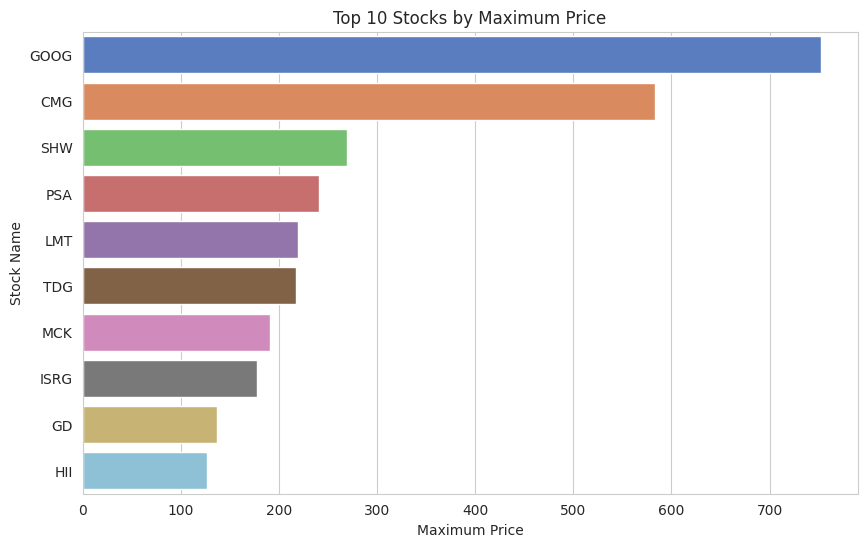

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:08...|BIIB|   286.52|   1|
|[2023-11-06 20:08...| SHW|   251.02|   2|
|[2023-11-06 20:08...| LMT|   219.36|   3|
|[2023-11-06 20:08...| HUM|    177.8|   4|
|[2023-11-06 20:08...|ULTA|   175.34|   5|
|[2023-11-06 20:08...| AVB|   174.44|   6|
|[2023-11-06 20:08...|ILMN|   164.35|   7|
|[2023-11-06 20:08...| MHK|   163.09|   8|
|[2023-11-06 20:08...| WHR|   150.06|   9|
|[2023-11-06 20:08...| BDX|   145.84|  10|
+--------------------+----+---------+----+



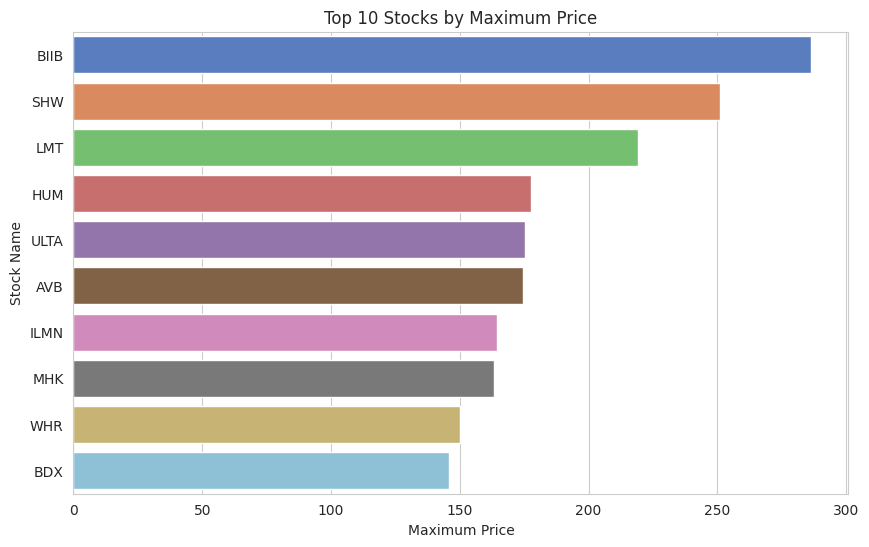

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:08...| MTD|   318.94|   1|
|[2023-11-06 20:08...| TDG|    221.9|   2|
|[2023-11-06 20:08...| ADS|   205.57|   3|
|[2023-11-06 20:08...| AYI|   194.91|   4|
|[2023-11-06 20:08...|ISRG| 179.8065|   5|
|[2023-11-06 20:08...| HUM|   171.68|   6|
|[2023-11-06 20:08...|  GS|   149.72|   7|
|[2023-11-06 20:08...| KMB|    132.5|   8|
|[2023-11-06 20:08...| MLM|   131.83|   9|
|[2023-11-06 20:08...| FDX|   130.65|  10|
+--------------------+----+---------+----+



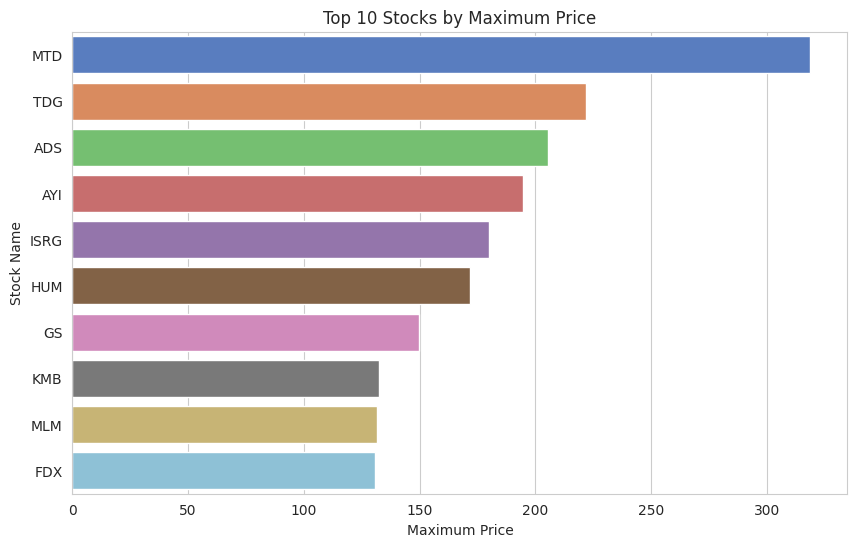

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:09...| ULTA|   192.62|   1|
|[2023-11-06 20:09...| ILMN|   148.13|   2|
|[2023-11-06 20:09...|   CI|   142.45|   3|
|[2023-11-06 20:09...|BRK.B|   139.34|   4|
|[2023-11-06 20:09...|  CLX|   127.49|   5|
|[2023-11-06 20:09...| SRCL|   123.83|   6|
|[2023-11-06 20:09...|  RTN|   123.17|   7|
|[2023-11-06 20:09...|  AET|   112.74|   8|
|[2023-11-06 20:09...|  ECL|   109.27|   9|
|[2023-11-06 20:09...|   PH|   108.07|  10|
|[2023-11-06 20:08...|  SPG|   196.27|   1|
|[2023-11-06 20:08...|  HUM|    185.0|   2|
|[2023-11-06 20:08...|  ROP|    169.0|   3|
|[2023-11-06 20:08...|   CI|   140.64|   4|
|[2023-11-06 20:08...|  TMO|   129.84|   5|
|[2023-11-06 20:08...|   CB|    117.0|   6|
|[2023-11-06 20:08...| SRCL|   115.36|   7|
|[2023-11-06 20:08...|  ECL|    105.7|   8|
|[2023-11-06 20:08...| VRTX|    92.25|   9|
|[2023-11-06 20:08...| SPGI|    

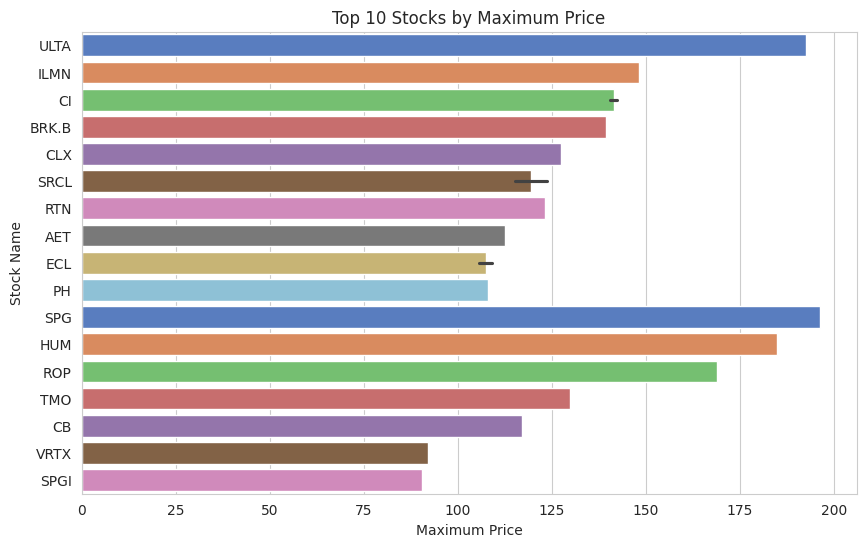

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:09...|GOOGL|   704.12|   1|
|[2023-11-06 20:09...| AMZN|   594.32|   2|
|[2023-11-06 20:09...| ORLY|   272.64|   3|
|[2023-11-06 20:09...|  MLM|   170.19|   4|
|[2023-11-06 20:09...|  SNA|    160.8|   5|
|[2023-11-06 20:09...| COST|   153.72|   6|
|[2023-11-06 20:09...|  HII|   143.55|   7|
|[2023-11-06 20:09...|  WAT|   134.86|   8|
|[2023-11-06 20:09...|  UNH|    130.5|   9|
|[2023-11-06 20:09...|  SJM|   128.16|  10|
+--------------------+-----+---------+----+



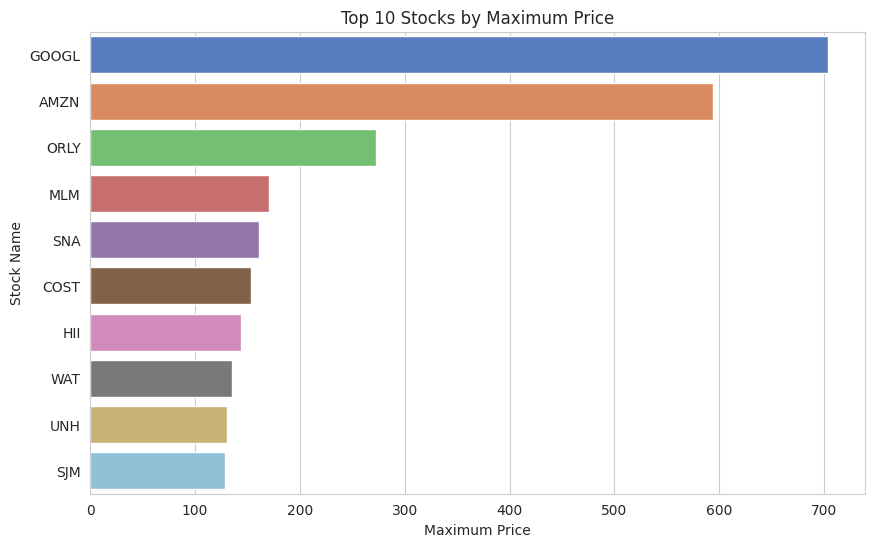

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:09...|PCLN|  1278.45|   1|
|[2023-11-06 20:09...|EQIX|   344.28|   2|
|[2023-11-06 20:09...|CHTR|    225.8|   3|
|[2023-11-06 20:09...| MLM|   185.86|   4|
|[2023-11-06 20:09...| HUM|   173.97|   5|
|[2023-11-06 20:09...| AMG|   164.76|   6|
|[2023-11-06 20:09...| APD|    144.2|   7|
|[2023-11-06 20:09...|ANTM|   138.79|   8|
|[2023-11-06 20:09...| LLL|   135.05|   9|
|[2023-11-06 20:09...|ILMN|    134.3|  10|
+--------------------+----+---------+----+



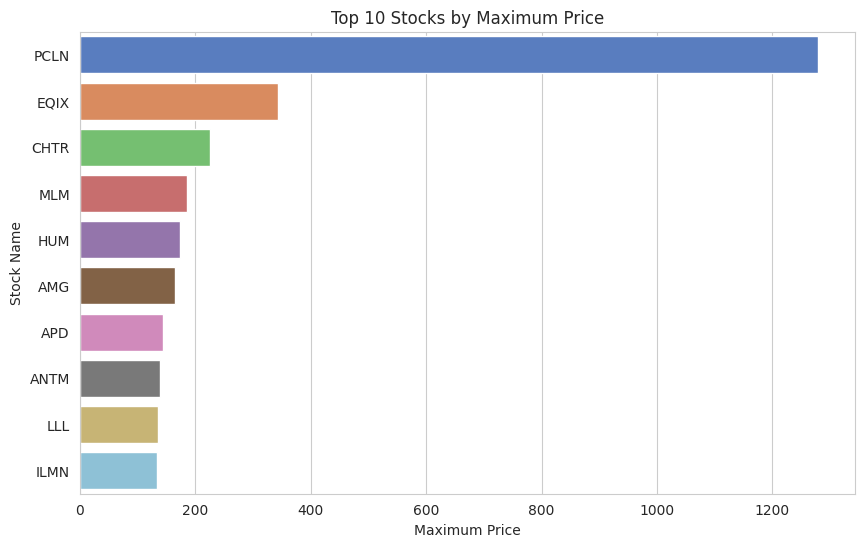

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:09...|GOOGL|    738.5|   1|
|[2023-11-06 20:09...|  CMG|   433.81|   2|
|[2023-11-06 20:09...|  SHW|   290.37|   3|
|[2023-11-06 20:09...|  TDG|   266.37|   4|
|[2023-11-06 20:09...|  PSA|   239.98|   5|
|[2023-11-06 20:09...| ULTA|    239.7|   6|
|[2023-11-06 20:09...| CHTR|   224.45|   7|
|[2023-11-06 20:09...|  GWW|   217.72|   8|
|[2023-11-06 20:09...|  NOC|   213.01|   9|
|[2023-11-06 20:09...|  HUM|   184.88|  10|
+--------------------+-----+---------+----+



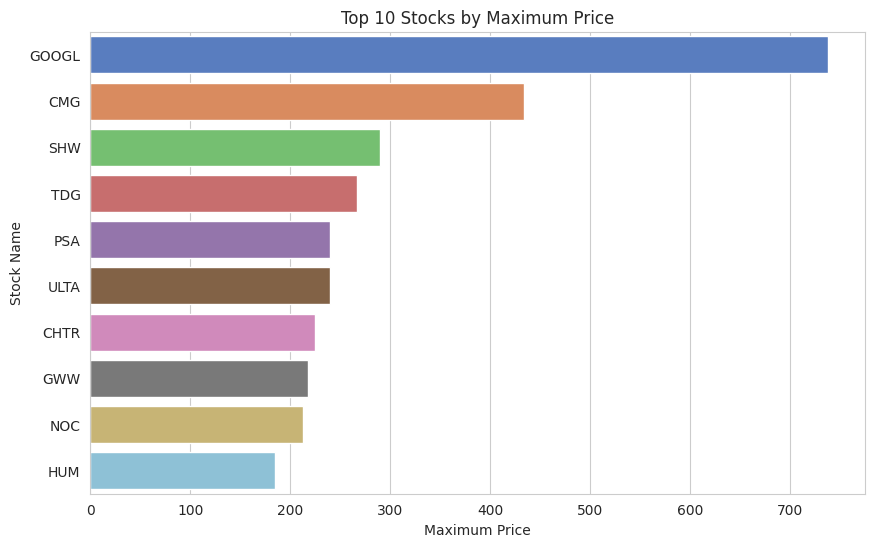

+--------------------+-----+---------+----+
|              window| name|max_price|rank|
+--------------------+-----+---------+----+
|[2023-11-06 20:09...|  AZO|   792.99|   1|
|[2023-11-06 20:09...|GOOGL|   691.37|   2|
|[2023-11-06 20:09...|  CMG|   409.49|   3|
|[2023-11-06 20:09...| REGN|   370.87|   4|
|[2023-11-06 20:09...|  BLK|   355.46|   5|
|[2023-11-06 20:09...|  AYI|   266.65|   6|
|[2023-11-06 20:09...|  GWW|   231.18|   7|
|[2023-11-06 20:09...|  COO|   178.12|   8|
|[2023-11-06 20:09...|  ROP|   173.54|   9|
|[2023-11-06 20:09...|  WHR|   171.83|  10|
+--------------------+-----+---------+----+



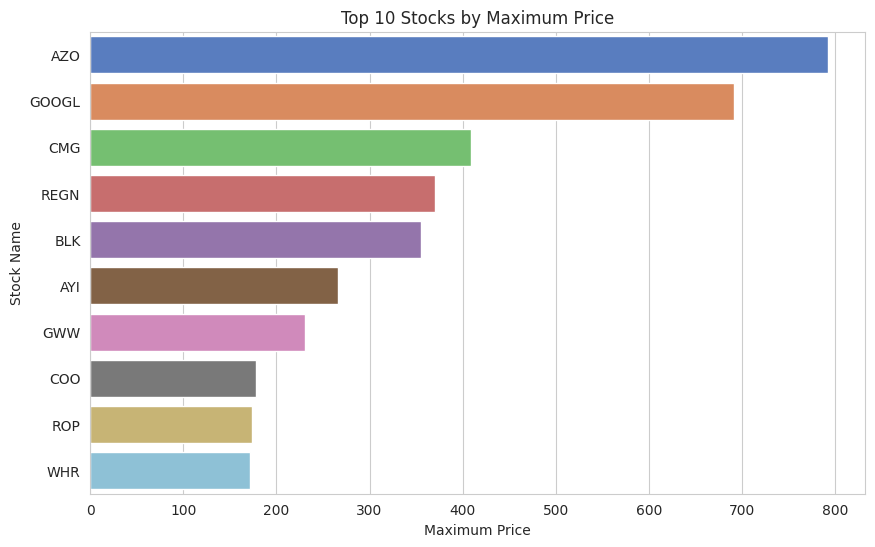

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:09...| MON|    105.8|   1|
|[2023-11-06 20:09...|PRGO|    92.66|   2|
|[2023-11-06 20:09...|  ES|    58.78|   3|
|[2023-11-06 20:09...| RJF|    53.89|   4|
|[2023-11-06 20:09...| LNT|    39.71|   5|
|[2023-11-06 20:09...| IVZ|    28.11|   6|
+--------------------+----+---------+----+



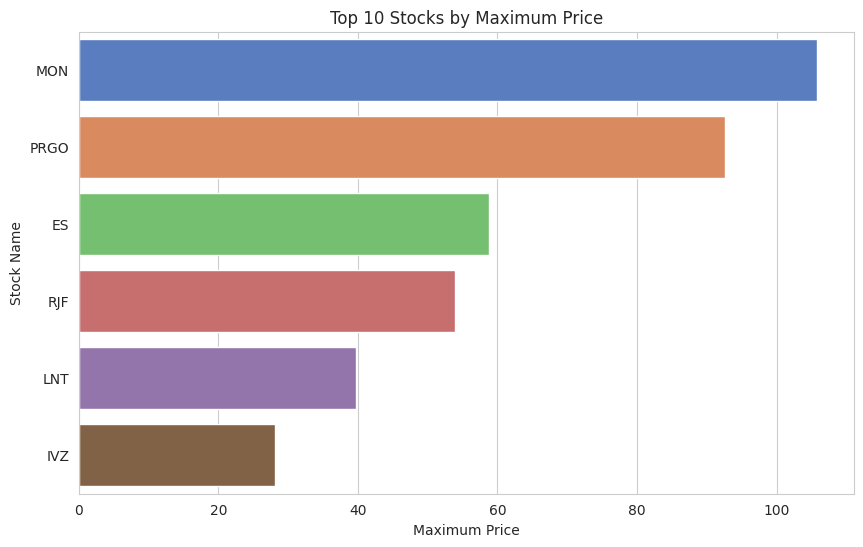

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:09...|ORLY|   281.95|   1|
|[2023-11-06 20:09...| ROP|   162.62|   2|
|[2023-11-06 20:09...| BMY|     75.7|   3|
|[2023-11-06 20:09...| PEG|    46.39|   4|
|[2023-11-06 20:09...| TPR|    43.11|   5|
|[2023-11-06 20:09...| BWA|    33.37|   6|
+--------------------+----+---------+----+



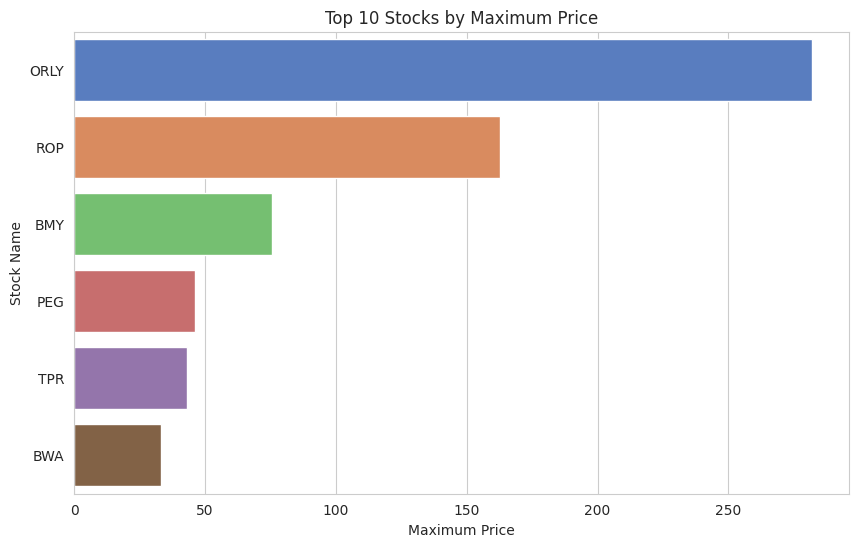

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:09...| RTN|   136.67|   1|
|[2023-11-06 20:09...| UHS|   129.35|   2|
|[2023-11-06 20:09...| DHR|    81.22|   3|
|[2023-11-06 20:09...|  SO|    54.14|   4|
|[2023-11-06 20:09...| PLD|    53.08|   5|
|[2023-11-06 20:09...| CHD|     49.4|   6|
+--------------------+----+---------+----+



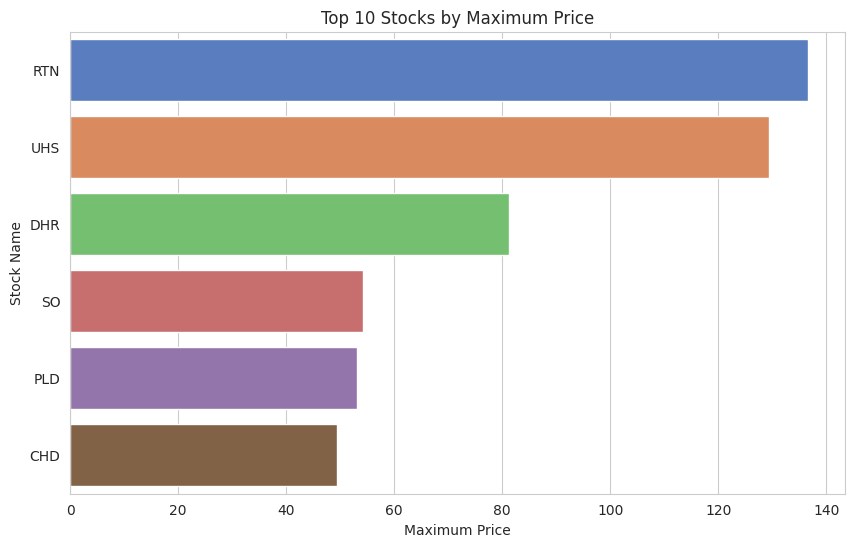

+--------------------+----+---------+----+
|              window|name|max_price|rank|
+--------------------+----+---------+----+
|[2023-11-06 20:09...| CMI|    122.0|   1|
|[2023-11-06 20:09...| CVS|    92.67|   2|
|[2023-11-06 20:09...|ANSS|    89.96|   3|
|[2023-11-06 20:09...| MAR|    69.52|   4|
|[2023-11-06 20:09...|EXPD|    49.96|   5|
|[2023-11-06 20:09...| IPG|    23.06|   6|
+--------------------+----+---------+----+



In [8]:
# Define the window operation
window_duration = "80 seconds"  # 80 seconds window

# Define the processing function
def process_batch(df, epoch_id):
    # Group the data by window and name, and calculate the max price for each stock
    windowedStocks = df.groupBy(
        window(col("timestamp"), window_duration),
        col("name")
    ).max("price").withColumnRenamed("max(price)", "max_price")
    
    
    # Define the window specification for ranking
    windowSpec = Window.partitionBy("window").orderBy(desc("max_price"))
    
    
    # Apply the rank function over the window specification
    windowedStocks = windowedStocks.withColumn("rank", rank().over(windowSpec))
    
    
    # Filter for the top N stocks
    N = 10  
    Stockstop = windowedStocks.where(col("rank") <= N)
    
    # Show or store the results
    Stockstop.show()
    
    result_pdf = Stockstop.toPandas()

    # Use Seaborn to create a bar plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(data=result_pdf, x='max_price', y='name', palette='muted')
    
    # Set the title and labels
    barplot.set_title('Top 10 Stocks by Maximum Price')
    barplot.set_xlabel('Maximum Price')
    barplot.set_ylabel('Stock Name')

    # Show the plot
    plt.show()
    
    
# Apply the function to each micro-batch
query = df.writeStream.foreachBatch(process_batch)\
.start()



## Select the stocks that lost value between two windows

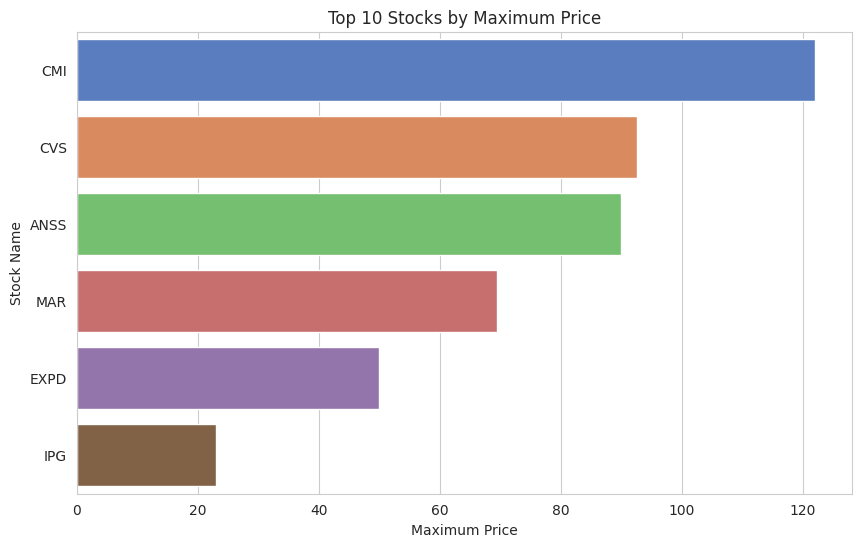

In [9]:
query.stop()


In [10]:
from pyspark.sql.functions import lag, col, window
from pyspark.sql.window import Window

# Define the window operation
window_duration = "80 seconds"  # 80 seconds window

# Define the processing function
def process_batch_find_losers(df, epoch_id):
    # Calculate the max price for each stock in the current window
    windowedStocksCurrent = df.groupBy(
        window(col("timestamp"), window_duration),
        col("name")
    ).max("price").withColumnRenamed("max(price)", "current_max_price")
    
    # Define the window specification for offsetting
    windowSpec = Window.partitionBy("name").orderBy("window.start")

    # Use the lag function to get the previous window's max price
    windowedStocksPrevious = windowedStocksCurrent.withColumn("previous_max_price", lag(col("current_max_price")).over(windowSpec))

    # Calculate the difference in price
    priceDifference = windowedStocksPrevious.withColumn("price_difference", col("current_max_price") - col("previous_max_price"))

    # Filter for stocks that have lost value (negative price difference)
    stocksLostValue = priceDifference.filter(col("price_difference") < 0)

    # Show or store the results
    stocksLostValue.show()

# Apply the function to each micro-batch
query2 = df.writeStream.foreachBatch(process_batch_find_losers).start()



23/11/06 20:10:51 WARN StreamingQueryManager: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-4aadf7bb-8c6d-46a9-bf66-bac410881a87. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.


+------+----+-----------------+------------------+----------------+
|window|name|current_max_price|previous_max_price|price_difference|
+------+----+-----------------+------------------+----------------+
+------+----+-----------------+------------------+----------------+

+------+----+-----------------+------------------+----------------+
|window|name|current_max_price|previous_max_price|price_difference|
+------+----+-----------------+------------------+----------------+
+------+----+-----------------+------------------+----------------+

+------+----+-----------------+------------------+----------------+
|window|name|current_max_price|previous_max_price|price_difference|
+------+----+-----------------+------------------+----------------+
+------+----+-----------------+------------------+----------------+

+------+----+-----------------+------------------+----------------+
|window|name|current_max_price|previous_max_price|price_difference|
+------+----+-----------------+--------------

## Select the stock that gained the most (between windows)

In [11]:
query2.stop()

+------+----+-----------------+------------------+----------------+
|window|name|current_max_price|previous_max_price|price_difference|
+------+----+-----------------+------------------+----------------+
+------+----+-----------------+------------------+----------------+



In [12]:
# remember you can register another stream
from pyspark.sql.functions import lag, col
from pyspark.sql.window import Window

# Define the window operation
window_duration = "80 seconds"  # 80 seconds window

# Define the processing function for finding gainers
def process_batch_find_gainers(df, epoch_id):
    # Calculate the max price for each stock in the current window
    windowedStocksCurrent = df.groupBy(
        window(col("timestamp"), window_duration),
        col("name")
    ).max("price").withColumnRenamed("max(price)", "current_max_price")
    
    # Define the window specification for offsetting
    windowSpec = Window.partitionBy("name").orderBy("window")

    # Use the lag function to get the previous window's max price
    windowedStocksPrevious = windowedStocksCurrent.withColumn("previous_max_price", lag(col("current_max_price")).over(windowSpec))

    # Calculate the difference in price
    priceDifference = windowedStocksPrevious.withColumn("price_difference", col("current_max_price") - col("previous_max_price"))

    # Filter for stocks that have gained value (positive price difference)
    stocksGainedValue = priceDifference.filter(col("price_difference") > 0)

    # Show or store the results
    stocksGainedValue.show()

# Apply the function to each micro-batch
query3 = df.writeStream.foreachBatch(process_batch_find_gainers).start()

#query.awaitTermination()


23/11/06 20:11:18 WARN StreamingQueryManager: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-16613ca4-f1ba-44fe-8b39-30a15e781fb7. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.


+------+----+-----------------+------------------+----------------+
|window|name|current_max_price|previous_max_price|price_difference|
+------+----+-----------------+------------------+----------------+
+------+----+-----------------+------------------+----------------+

+------+----+-----------------+------------------+----------------+
|window|name|current_max_price|previous_max_price|price_difference|
+------+----+-----------------+------------------+----------------+
+------+----+-----------------+------------------+----------------+

+--------------------+----+-----------------+------------------+------------------+
|              window|name|current_max_price|previous_max_price|  price_difference|
+--------------------+----+-----------------+------------------+------------------+
|[2023-11-06 19:44...| CMG|           375.27|            362.18|13.089999999999975|
|[2023-11-06 19:44...|  PG|            79.47|              77.9|1.5699999999999932|
|[2023-11-06 19:44...| WAT|       

In [13]:
query3.stop()

+------+----+-----------------+------------------+----------------+
|window|name|current_max_price|previous_max_price|price_difference|
+------+----+-----------------+------------------+----------------+
+------+----+-----------------+------------------+----------------+



## Implement a control that checks if a stock does not lose too much value in a period of time.


In [14]:
# remember you can register another stream
from pyspark.sql.functions import *
from pyspark.sql.window import Window

window_duration = "80 seconds"  # 80 seconds window
# Define the processing function for controlling loss
def process_batch_control_loss(df, epoch_id):
    # Calculate the max price for each stock in the current window
    windowedStocks = df.groupBy(
        window(col("timestamp"), window_duration),
        col("name")
    ).max("price").withColumnRenamed("max(price)", "current_max_price")
    
    # Define the window specification for offsetting
    windowSpec = Window.partitionBy("name").orderBy("window")

    # Use the lag function to get the previous window's max price
    windowedStocks = windowedStocks.withColumn("previous_max_price", lag(col("current_max_price")).over(windowSpec))

    # Calculate the difference in price
    windowedStocks = windowedStocks.withColumn("price_difference", col("current_max_price") - col("previous_max_price"))

    # Define a threshold for maximum allowed loss
    max_allowed_loss = -5  # This is an example value, set your own threshold

    # Add a control column that flags stocks that have lost too much value
    windowedStocks = windowedStocks.withColumn("excessive_loss", when(col("price_difference") < max_allowed_loss, True).otherwise(False))

    # Filter for stocks that have an excessive loss
    stocksExcessiveLoss = windowedStocks.filter(col("excessive_loss") == True)

    # Show or store the results
    stocksExcessiveLoss.show()


# Apply the function to each micro-batch
query4 = df.writeStream.foreachBatch(process_batch_control_loss).start()

#query.awaitTermination()

23/11/06 20:12:57 WARN StreamingQueryManager: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-50a7f4da-ab8e-4166-8af3-3d194b03990e. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.


+------+----+-----------------+------------------+----------------+--------------+
|window|name|current_max_price|previous_max_price|price_difference|excessive_loss|
+------+----+-----------------+------------------+----------------+--------------+
+------+----+-----------------+------------------+----------------+--------------+

+------+----+-----------------+------------------+----------------+--------------+
|window|name|current_max_price|previous_max_price|price_difference|excessive_loss|
+------+----+-----------------+------------------+----------------+--------------+
+------+----+-----------------+------------------+----------------+--------------+

+------+----+-----------------+------------------+----------------+--------------+
|window|name|current_max_price|previous_max_price|price_difference|excessive_loss|
+------+----+-----------------+------------------+----------------+--------------+
+------+----+-----------------+------------------+----------------+--------------+

+

In [15]:
query4.stop()

+------+----+-----------------+------------------+----------------+--------------+
|window|name|current_max_price|previous_max_price|price_difference|excessive_loss|
+------+----+-----------------+------------------+----------------+--------------+
+------+----+-----------------+------------------+----------------+--------------+

+------+----+-----------------+------------------+----------------+--------------+
|window|name|current_max_price|previous_max_price|price_difference|excessive_loss|
+------+----+-----------------+------------------+----------------+--------------+
+------+----+-----------------+------------------+----------------+--------------+



## Compute your assets

In [19]:

# List of stock names from the image
stock_names = ['AZO', 'ISRG', 'RE', 'PXD', 'CMI', 'KMB', 'LH', 'ACN', 'VTR', 'ARE']

# Create a DataFrame with stock names
df_portfolio = spark.createDataFrame(stock_names, StringType()).toDF("name")

# Add a column with random amounts
df_portfolio = df_portfolio.withColumn("amount", (rand() * 100).cast('integer'))

# Show the DataFrame
df_portfolio.show()




+----+------+
|name|amount|
+----+------+
| AZO|    14|
|ISRG|    71|
|  RE|    47|
| PXD|    22|
| CMI|    51|
| KMB|    49|
|  LH|    88|
| ACN|    92|
| VTR|    31|
| ARE|    53|
+----+------+



In [20]:
from pyspark.sql.functions import col

# Define the processing function
def compute_asset_value(df_batch, epoch_id):
    # Join the market DataFrame with the portfolio DataFrame on the stock name
    df_joined = df_batch.join(df_portfolio, df_batch.name == df_portfolio.name)

    # Calculate the current market value of each stock in the portfolio
    df_with_market_value = df_joined.withColumn("market_value", col("price") * col("amount"))

    # Show the DataFrame with market values
    df_with_market_value.show()

    # If you want to calculate the total market value of the portfolio, uncomment the following lines:
    # total_market_value = df_with_market_value.groupBy().sum("market_value").collect()[0][0]
    # print(f"Total Market Value at epoch {epoch_id}: {total_market_value}")

# Apply the function to each micro-batch of the streaming DataFrame
query5 = df.writeStream.foreachBatch(compute_asset_value).start()



23/11/06 20:19:15 WARN StreamingQueryManager: Temporary checkpoint location created which is deleted normally when the query didn't fail: /tmp/temporary-5e7674f1-ad01-40fe-bd78-4c1b5c338b1b. If it's required to delete it under any circumstances, please set spark.sql.streaming.forceDeleteTempCheckpointLocation to true. Important to know deleting temp checkpoint folder is best effort.


+----+--------+-------------------+----+------+------------------+
|name|   price|          timestamp|name|amount|      market_value|
+----+--------+-------------------+----+------+------------------+
|  RE|  127.16|2023-11-06 19:43:27|  RE|    47|5976.5199999999995|
| ACN|   75.56|2023-11-06 19:43:23| ACN|    92|           6951.52|
| ARE|   70.97|2023-11-06 19:43:20| ARE|    53|           3761.41|
| KMB|   89.85|2023-11-06 19:43:13| KMB|    49|           4402.65|
|ISRG|191.9256|2023-11-06 19:43:10|ISRG|    71|        13626.7176|
|  LH|   89.64|2023-11-06 19:43:14|  LH|    88|           7888.32|
| CMI|  119.32|2023-11-06 19:43:14| CMI|    51|           6085.32|
| PXD|  122.17|2023-11-06 19:43:20| PXD|    22|2687.7400000000002|
| PXD|  124.88|2023-11-06 19:43:24| PXD|    22|2747.3599999999997|
| VTR|   71.95|2023-11-06 19:43:23| VTR|    31|2230.4500000000003|
| AZO|  382.14|2023-11-06 19:43:12| AZO|    14|           5349.96|
+----+--------+-------------------+----+------+---------------

In [21]:
query5.stop()

+----+-----+-------------------+----+------+------------------+
|name|price|          timestamp|name|amount|      market_value|
+----+-----+-------------------+----+------+------------------+
| ACN|72.99|2023-11-06 19:49:09| ACN|    92|           6715.08|
| KMB|97.94|2023-11-06 19:49:11| KMB|    49|4799.0599999999995|
|  LH|97.75|2023-11-06 19:49:23|  LH|    88|            8602.0|
+----+-----+-------------------+----+------+------------------+

+----+-----+-------------------+----+------+------------+
|name|price|          timestamp|name|amount|market_value|
+----+-----+-------------------+----+------+------------+
| CMI|131.8|2023-11-06 19:49:25| CMI|    51|      6721.8|
+----+-----+-------------------+----+------+------------+

